## Import all the needed packages

In [2]:
%matplotlib inline

# DataFrame
import pandas as pd

# Elasticsearch
# from elasticsearch import Elasticsearch, helpers

# datetime
from datetime import datetime

# isnan()
import math

# plot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Begin to experiment anomaly detection approaches

1.  MWT2_a -> MWT2_b


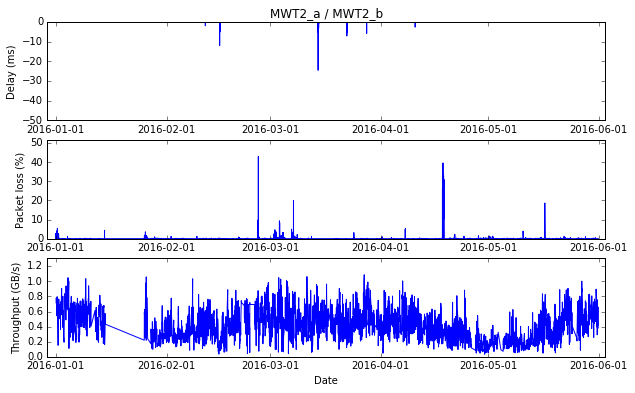

2.  MWT2_a -> MWT2_c


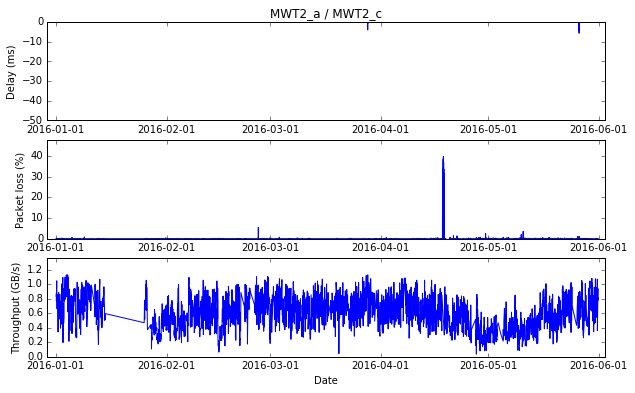

3.  MWT2_b -> MWT2_a


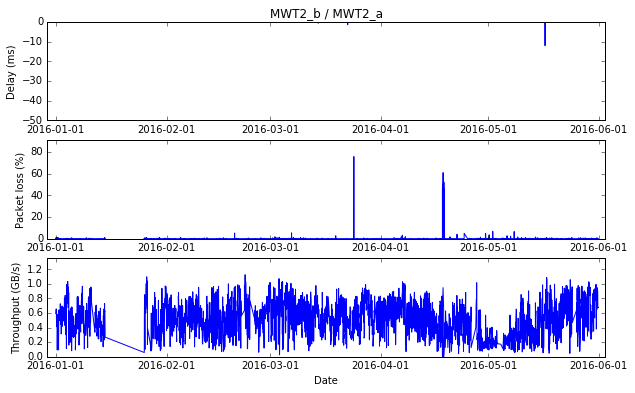

4.  MWT2_b -> MWT2_c


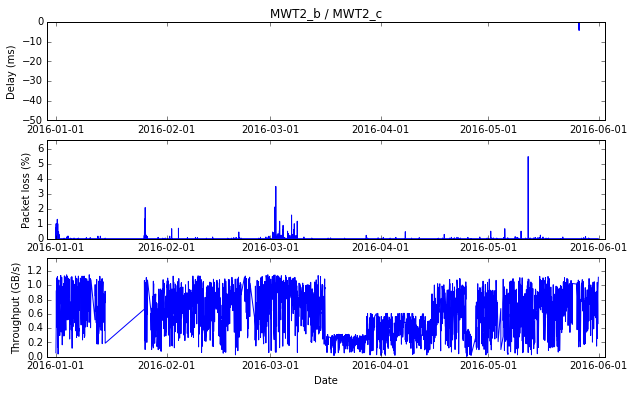

5.  MWT2_c -> MWT2_a


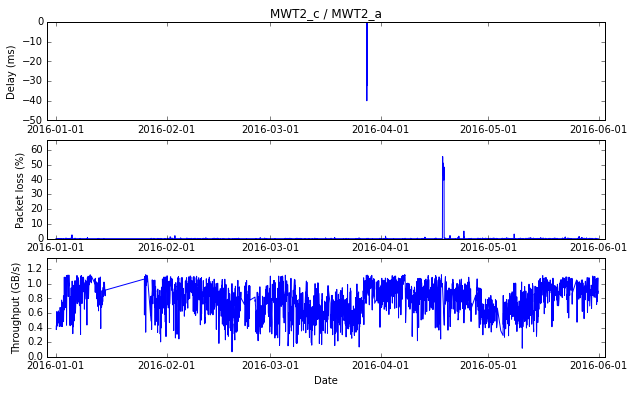

6.  MWT2_c -> MWT2_b


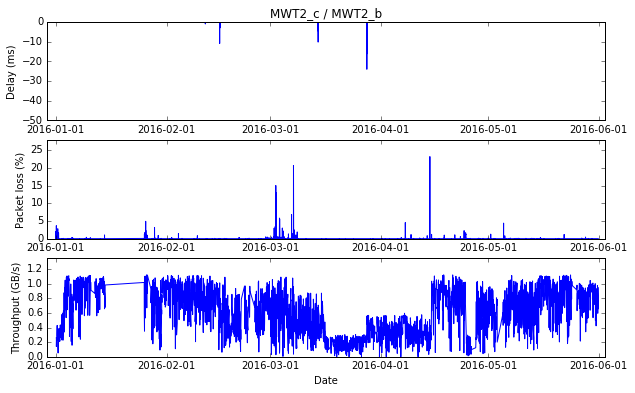

In [7]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            plt.figure(figsize=[10, 6])
            
            plt.subplot(3, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
#             plt.ylim([0, dm.max() * 1.2])
            plt.ylim([-50, 0])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(3, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(3, 1, 3)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (GB/s)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()

## Find out if the negative delay values occurs with any timing pattern

In [13]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
#             x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
#             lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            iso_time = data_lpl.iso_8601
            
#             print(iso_time.size)
#             print(dm.size)
#             print(pl.size)
            
            tt = iso_time.values
            dd = dm.values
            pp = pl.values
            
            for i in range(iso_time.size):
                if (dd[i] < 0):
                    print('-----------------')
                    print('{}        {}          {}'.format(tt[i], dd[i], pp[i]))
            
            print()
            print()
            print()
            print()
            print()
            
#             time_t = data_t.index
#             tp = data_t.throughput / 1024 / 1024 / 1024 / 8

1.  MWT2_a -> MWT2_b
-----------------
2016-02-11T20:25:00        -1.9          0.0
-----------------
2016-02-11T20:45:00        -0.6          0.0
-----------------
2016-02-15T20:55:00        -11.9          0.0
-----------------
2016-02-15T21:05:00        -2.9          0.0
-----------------
2016-02-15T21:25:00        -1.1          0.0
-----------------
2016-02-15T21:50:00        -2.6          0.0
-----------------
2016-02-15T22:00:00        -5.1          0.0
-----------------
2016-02-15T22:05:00        -0.1          0.0
-----------------
2016-02-15T22:20:00        -1.6          0.0
-----------------
2016-02-15T22:30:00        -3.5          0.0
-----------------
2016-02-15T22:50:00        -1.1          0.0
-----------------
2016-03-14T10:25:00        -12.0          0.0
-----------------
2016-03-14T10:30:00        -24.5          0.0
-----------------
2016-03-14T11:30:00        -0.4          0.03333333333333333
-----------------
2016-03-14T11:40:00        -2.6          0.0
---------------

## Begin to experiment with REALLY CENTRAL anomaly detection approaches!

In [ ]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
#             x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
#             lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            iso_time = data_lpl.iso_8601
            
#             print(iso_time.size)
#             print(dm.size)
#             print(pl.size)
            
            tt = iso_time.values
            dd = dm.values
            pp = pl.values
            
            for i in range(iso_time.size):
                if (dd[i] < 0):
                    print('-----------------')
                    print('{}        {}          {}'.format(tt[i], dd[i], pp[i]))
            
            print()
            print()
            print()
            print()
            print()

In [15]:
s = pd.Series([2, 4, 3, 1])
s.quantile(.75)

3.25

In [16]:
a = pd.DataFrame()

In [21]:
a.set_value(1000, 'delay', 23)
a.set_value(1000, 'packet_loss', 0)
a.set_value(1001, 'delay', 45)
a.set_value(1001, 'packet_loss', 0)
a.set_value(1002, 'delay', 22)
a.set_value(1002, 'packet_loss', 0.5)
a.set_value(1008, 'delay', 21)
a.set_value(1008, 'packet_loss', 0)
a.set_value(1011, 'delay', 23)
a.set_value(1011, 'packet_loss', 2.0)

delay  packet_loss
1000   23.0          0.0
1001   45.0          0.0
1002   22.0          0.5
1008   21.0          0.0
1011   23.0          2.0

In [22]:
a.index

Int64Index([1000, 1001, 1002, 1008, 1011], dtype='int64')

In [32]:
b = a[a.index < 1005]
c = b[b.index > 1000]

In [33]:
c.shape

(2, 2)

In [34]:
len(c.index)

2

In [54]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']
time_window_length = 2 * 60 * 60 * 1000   # convert hours to ms
src_i = 0
dest_i = 4
data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
dm = data_lpl.delay_median
pl = data_lpl.packet_loss
threshold = 0.99
dm_abnormal_cutoff = dm.quantile(threshold, interpolation='midpoint')
pl_abnormal_cutoff = pl.quantile(threshold, interpolation='midpoint')

row = data_lpl.shape[0]
for r in range(row):
    line = data_lpl.iloc[r]
    if line['delay_median'] > dm_abnormal_cutoff:
        data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', 1)
    else:
        data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', 0)
    if line['packet_loss'] > pl_abnormal_cutoff:
        data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', 1)
    else:
        data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', 0)

In [55]:
data_lpl

iso_8601  delay_median  delay_mean   delay_sd  \
1451607300000  2016-01-01T00:15:00          52.9   52.921208   0.238459   
1451608800000  2016-01-01T00:40:00          52.9   53.140333   6.789114   
1451610000000  2016-01-01T01:00:00          53.0   53.144000   2.333466   
1451611500000  2016-01-01T01:25:00          53.3   53.993125  15.465952   
1451613000000  2016-01-01T01:50:00          53.4   53.778000   8.130812   
1451614200000  2016-01-01T02:10:00          53.6   53.667278   0.178299   
1451616300000  2016-01-01T02:45:00          53.1   53.165125   1.191786   
1451617800000  2016-01-01T03:10:00          53.7   53.797267   1.694717   
1451619600000  2016-01-01T03:40:00          53.4   53.677667   4.461614   
1451620800000  2016-01-01T04:00:00          53.5   53.593708   1.127378   
1451622300000  2016-01-01T04:25:00          53.4   53.538167   5.112064   
1451623800000  2016-01-01T04:50:00          53.6   53.749000   1.244106   
1451625000000  2016-01-01T05:10:00          53.3   53.749542   9.420594   
1451626500000  2016-01-01T05:35:00          53.4   53.469333   0.203943   
1451628000000  2016-01-01T06:00:00          53.6   53.641125   0.974442   
1451629500000  2016-01-01T06:25:00          53.6   53.752333   2.935787   
1451630700000  2016-01-01T06:45:00          53.6   53.707900   1.192024   
1451632500000  2016-01-01T07:15:00          53.3   53.303000   0.101773   
1451633700000  2016-01-01T07:35:00          53.2   53.209300   0.256483   
1451635200000  2016-01-01T08:00:00          53.1   53.181379   0.229902   
1451636700000  2016-01-01T08:25:00          53.2   53.810944  13.635014   
1451638200000  2016-01-01T08:50:00          53.4   53.841500   3.880863   
1451639700000  2016-01-01T09:15:00          53.2   53.213000   0.127401   
1451641200000  2016-01-01T09:40:00          53.3   53.417833   1.669045   
1451643000000  2016-01-01T10:10:00          53.2   56.145500  35.020654   
1451644800000  2016-01-01T10:40:00          53.2   53.267167   1.125969   
1451646300000  2016-01-01T11:05:00          53.2   53.259583   0.287996   
1451647500000  2016-01-01T11:25:00          53.2   53.296133   1.002343   
1451649300000  2016-01-01T11:55:00          53.3   53.332333   0.574402   
1451651100000  2016-01-01T12:25:00          53.3   53.348333   1.279090   
...                            ...           ...         ...        ...   
1464681600000  2016-05-31T08:00:00          52.8   52.886889   1.180101   
1464683700000  2016-05-31T08:35:00          53.1   53.181667   2.646204   
1464685200000  2016-05-31T09:00:00          53.1   53.897667  11.817040   
1464686700000  2016-05-31T09:25:00          53.2   53.439667   5.947963   
1464687900000  2016-05-31T09:45:00          53.2   53.201333   0.276704   
1464689100000  2016-05-31T10:05:00          53.4   53.437000   0.953440   
1464690300000  2016-05-31T10:25:00          53.0   53.068333   0.472102   
1464692100000  2016-05-31T10:55:00          53.0   55.411667  29.858606   
1464693300000  2016-05-31T11:15:00          53.1   53.313792   5.331016   
1464694500000  2016-05-31T11:35:00          53.1   53.141458   0.163968   
1464696000000  2016-05-31T12:00:00          53.0   53.365000   7.728851   
1464697500000  2016-05-31T12:25:00          52.9   52.902722   0.340911   
1464701100000  2016-05-31T13:25:00          52.6   52.606000   0.294755   
1464702900000  2016-05-31T13:55:00          52.7   52.787500   1.063780   
1464704400000  2016-05-31T14:20:00          52.7   52.708833   0.218644   
1464706800000  2016-05-31T15:00:00          53.0   53.187750   3.859183   
1464708300000  2016-05-31T15:25:00          53.0   53.073833   0.268450   
1464709800000  2016-05-31T15:50:00          53.0   53.134467   2.730913   
1464711300000  2016-05-31T16:15:00          53.2   54.383467  17.802776   
1464712800000  2016-05-31T16:40:00          53.1   54.325000  18.657790   
1464714600000  2016-05-31T17:10:00          53.3   53.269750   0.122379   
1464716100000  2016-05-31T17:35:00          53.2   

1.  MWT2_a -> MWT2_b


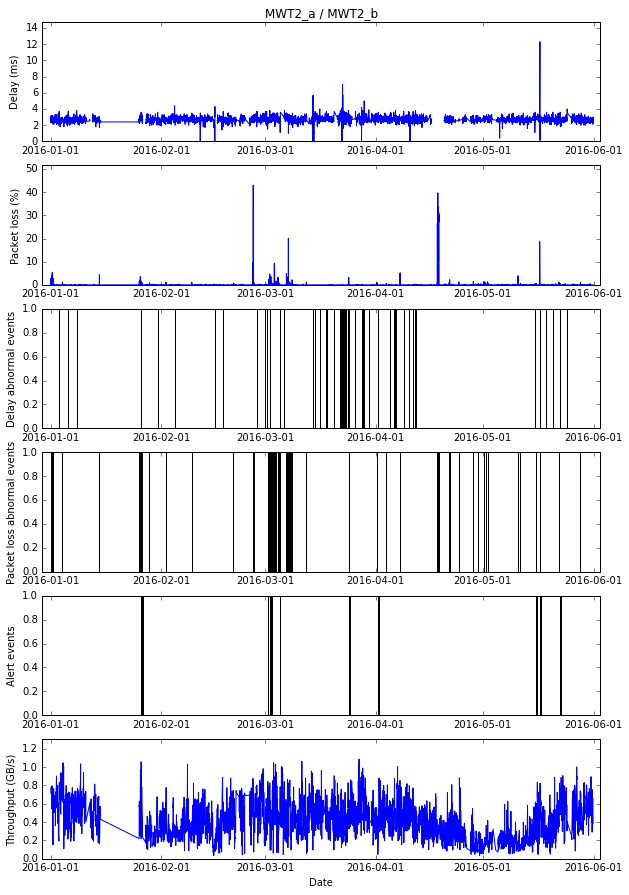

2.  MWT2_a -> MWT2_c


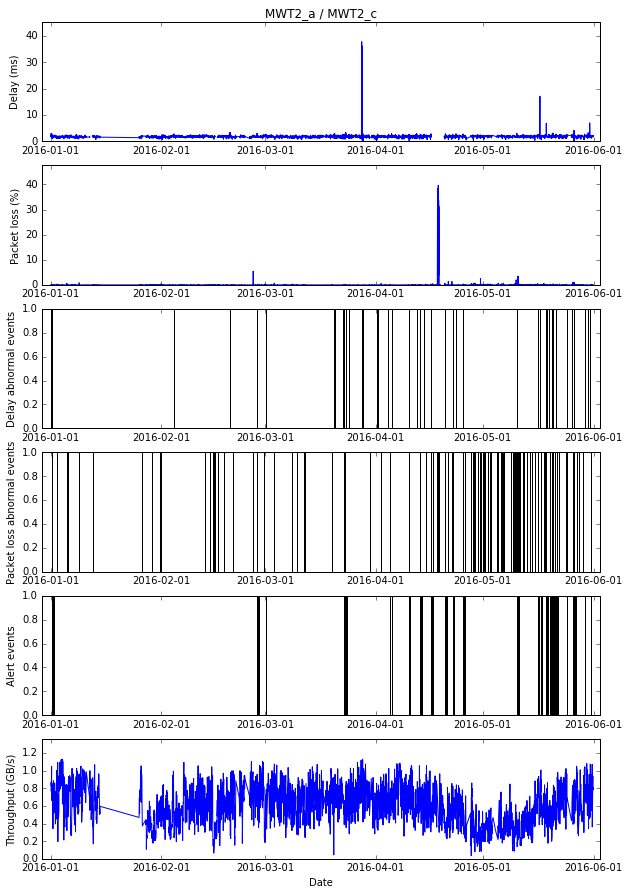

3.  MWT2_a -> SFU


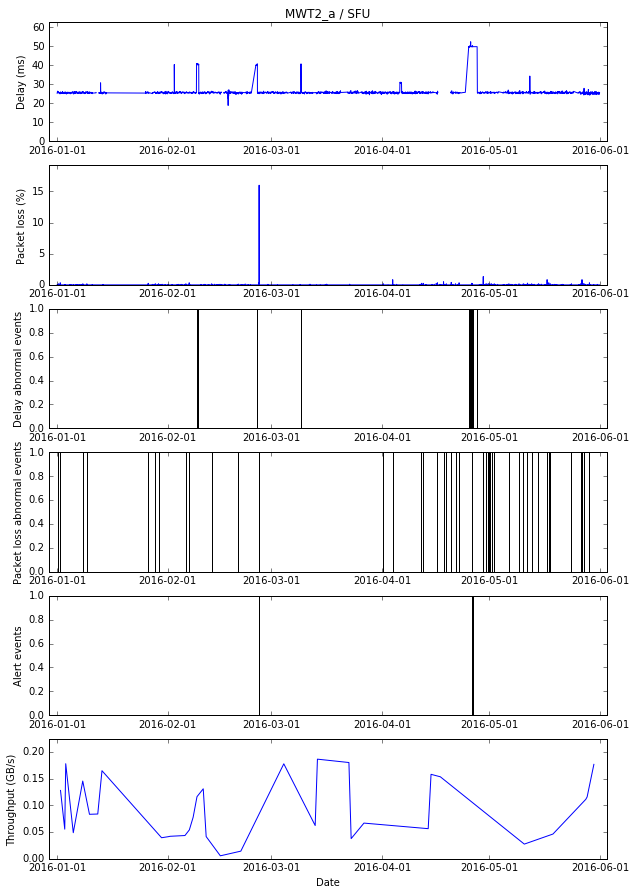

4.  MWT2_a -> CERN


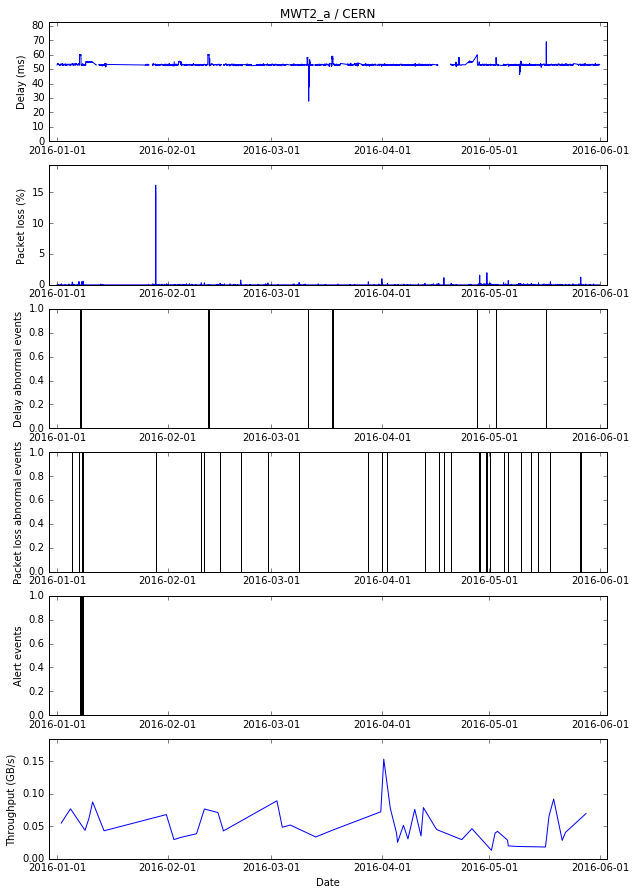

5.  MWT2_a -> BEIJING


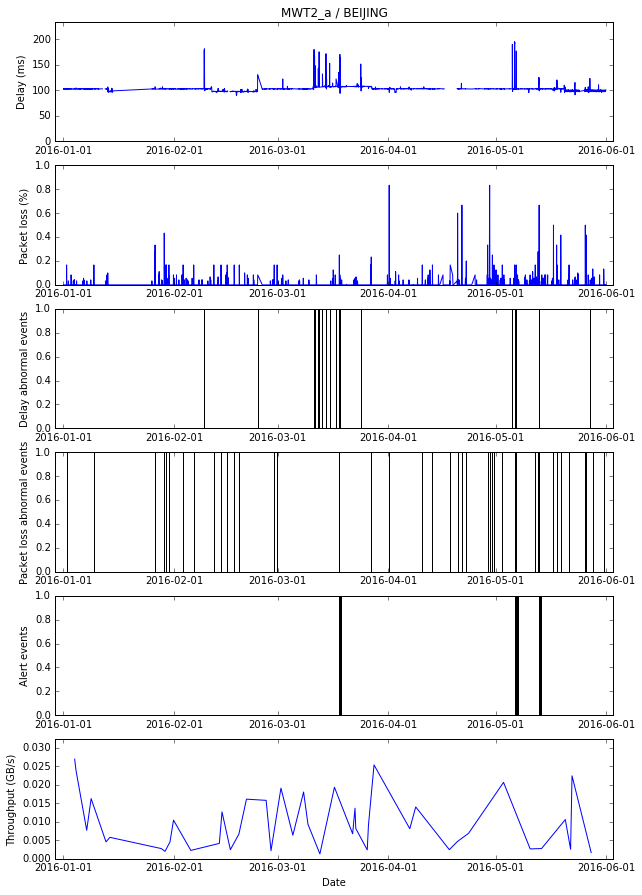

6.  MWT2_b -> MWT2_a


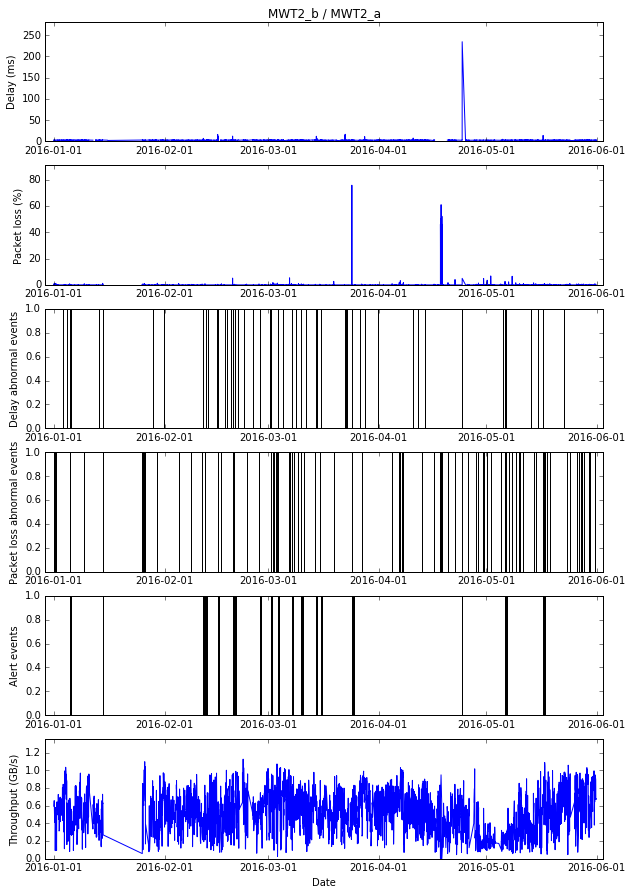

7.  MWT2_b -> MWT2_c


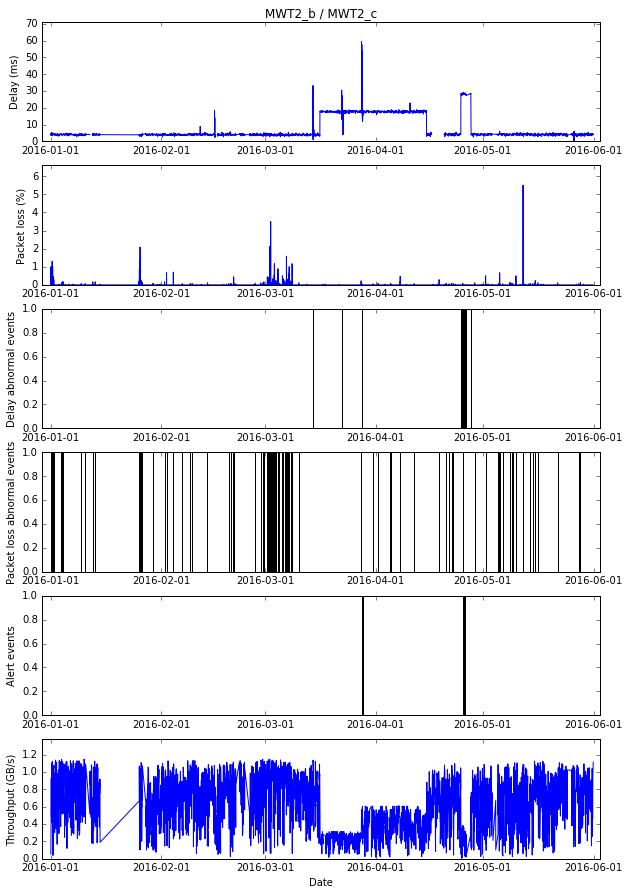

8.  MWT2_b -> SFU


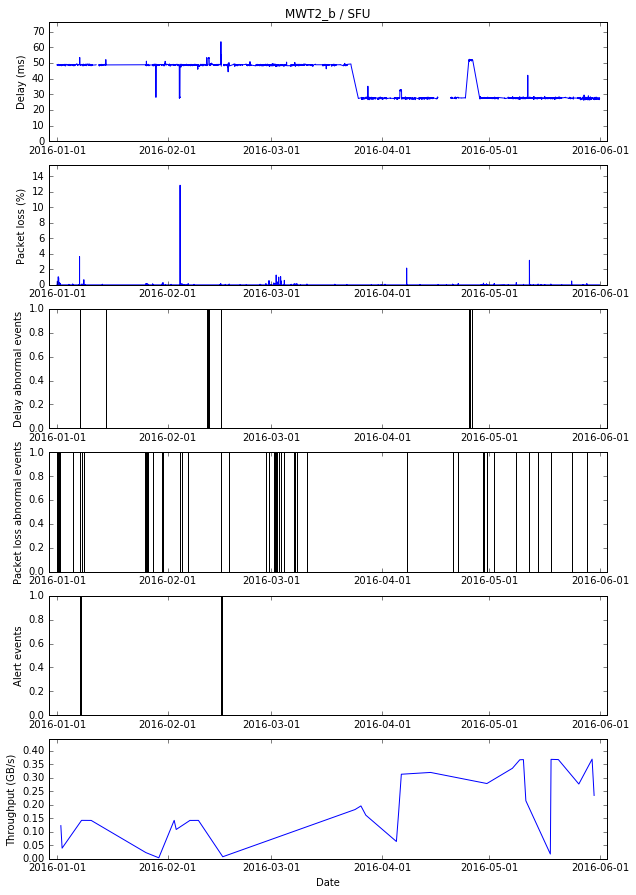

9.  MWT2_b -> CERN


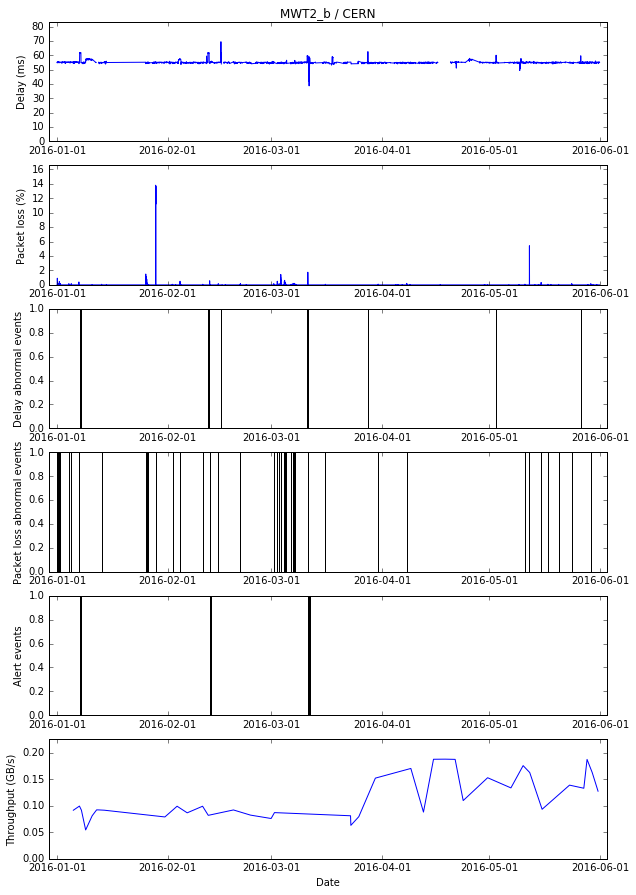

10.  MWT2_b -> BEIJING


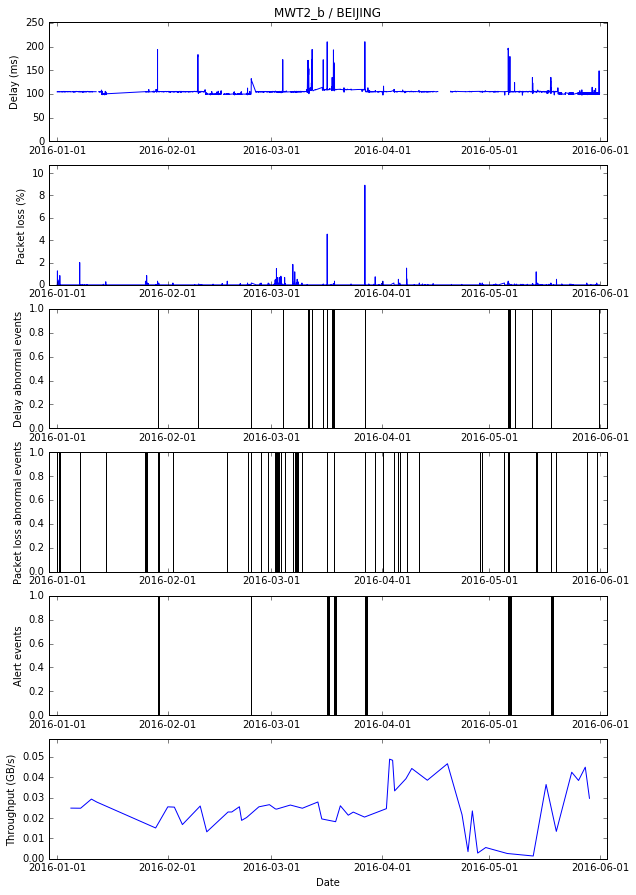

11.  MWT2_c -> MWT2_a


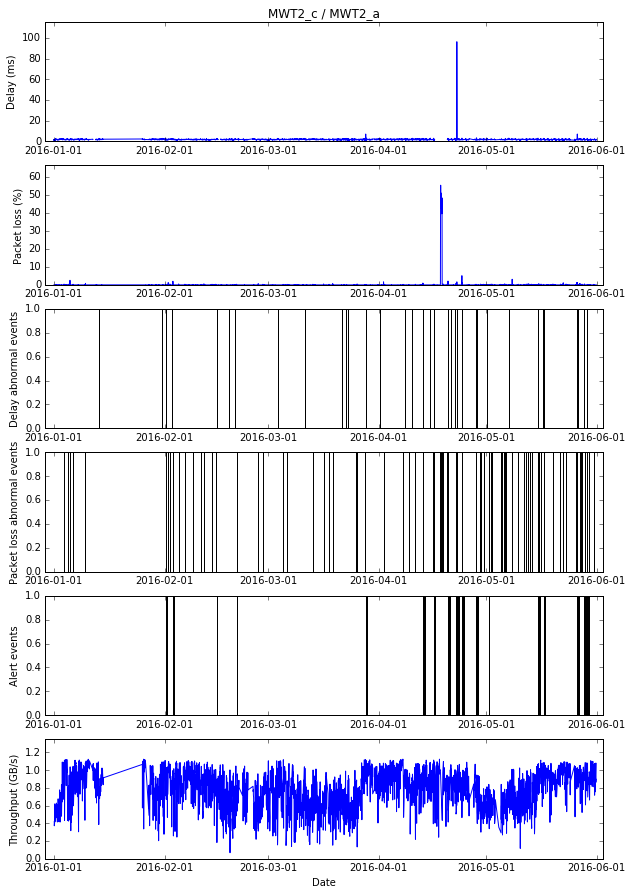

12.  MWT2_c -> MWT2_b


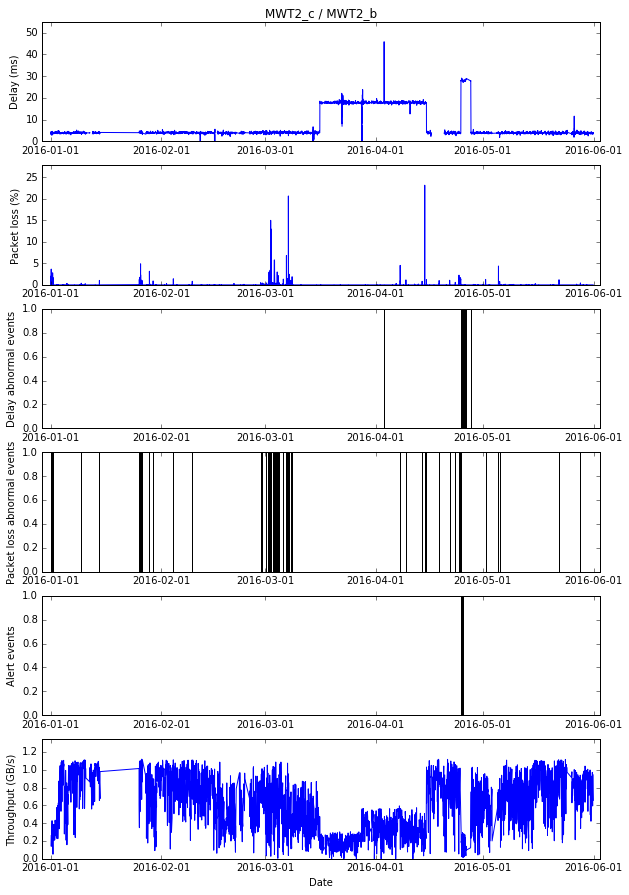

13.  MWT2_c -> SFU


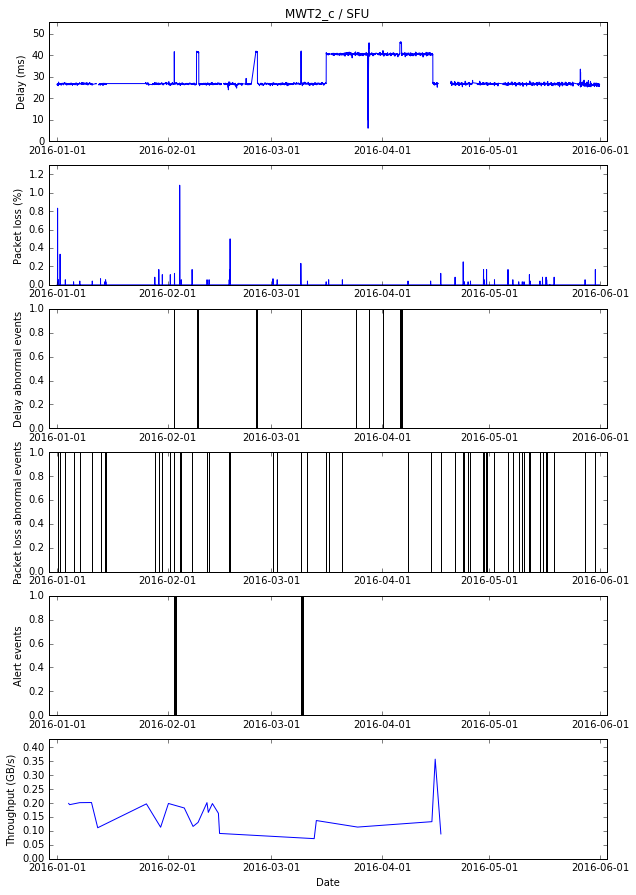

14.  MWT2_c -> CERN


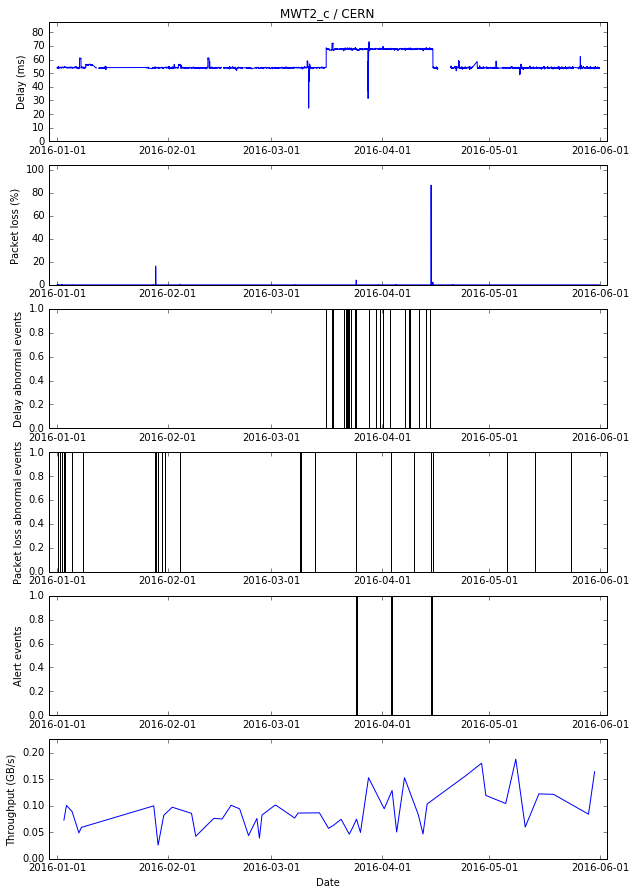

15.  MWT2_c -> BEIJING


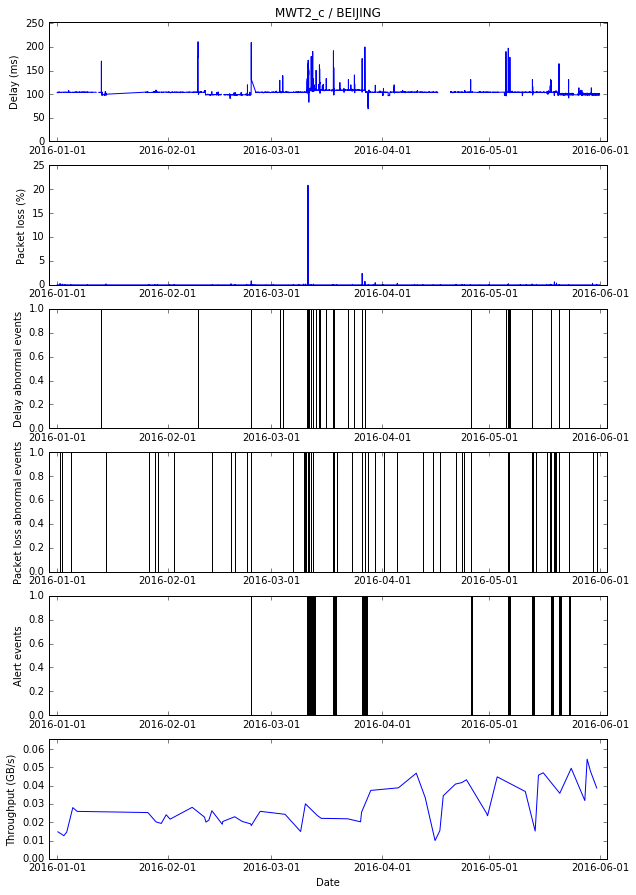

16.  SFU -> MWT2_a


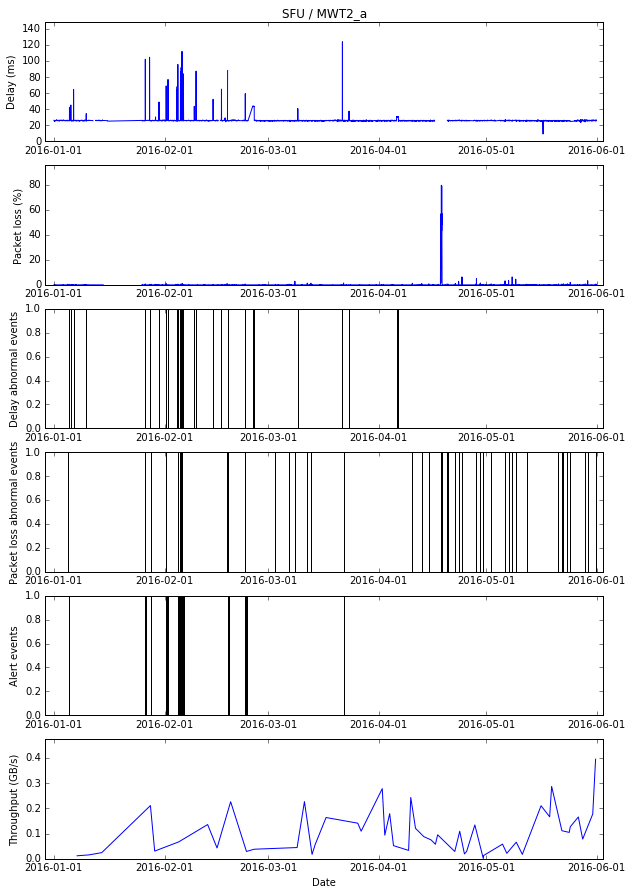

17.  SFU -> MWT2_b


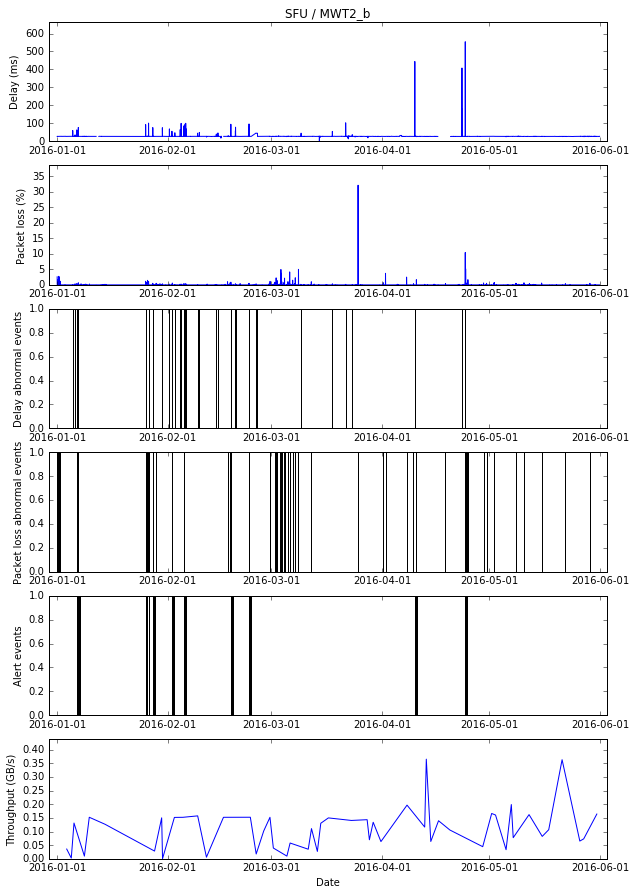

18.  SFU -> MWT2_c


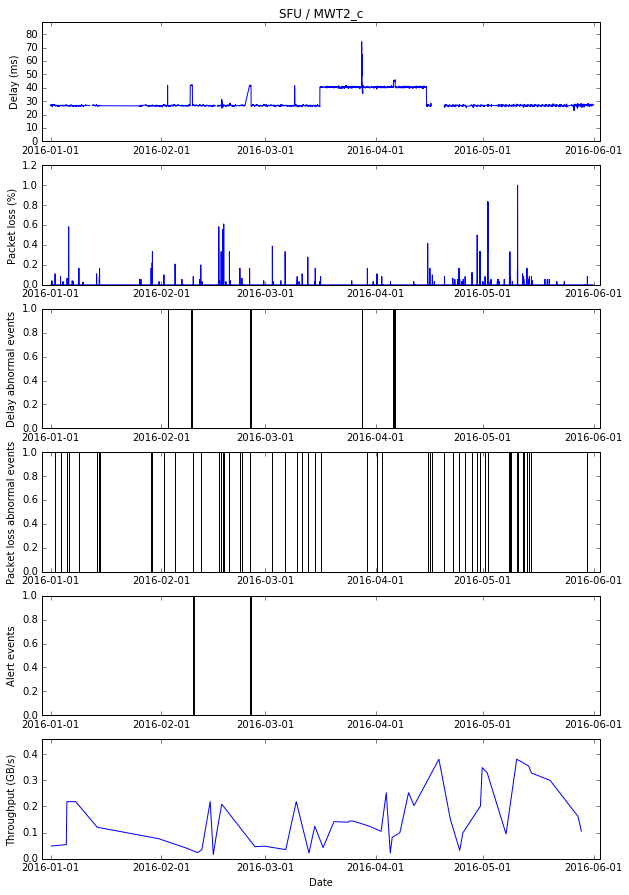

19.  SFU -> CERN


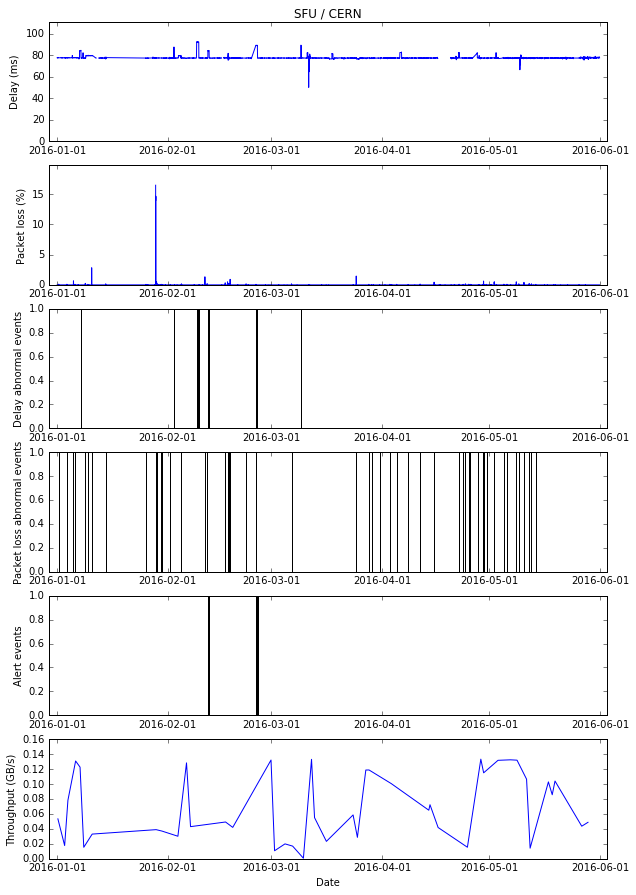

20.  SFU -> BEIJING


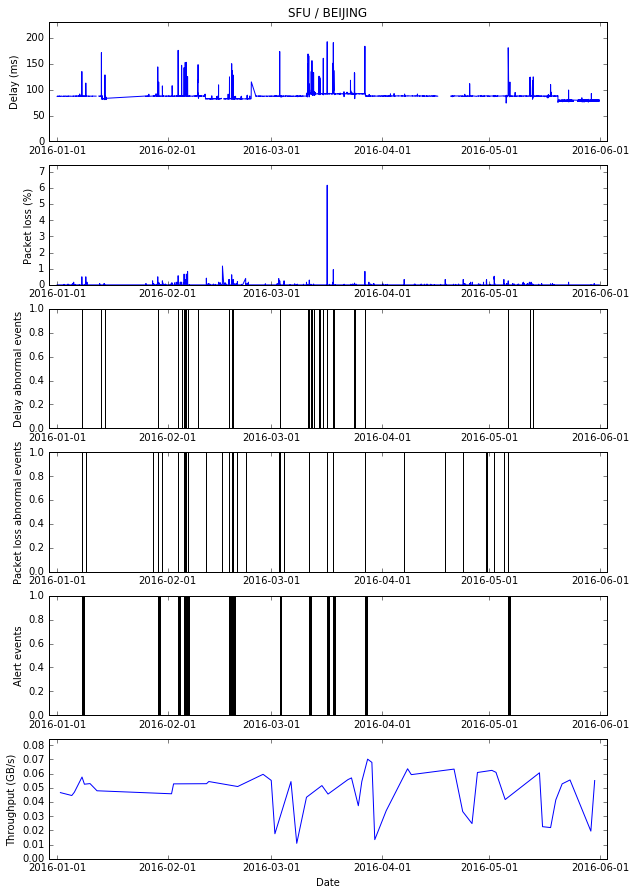

21.  CERN -> MWT2_a


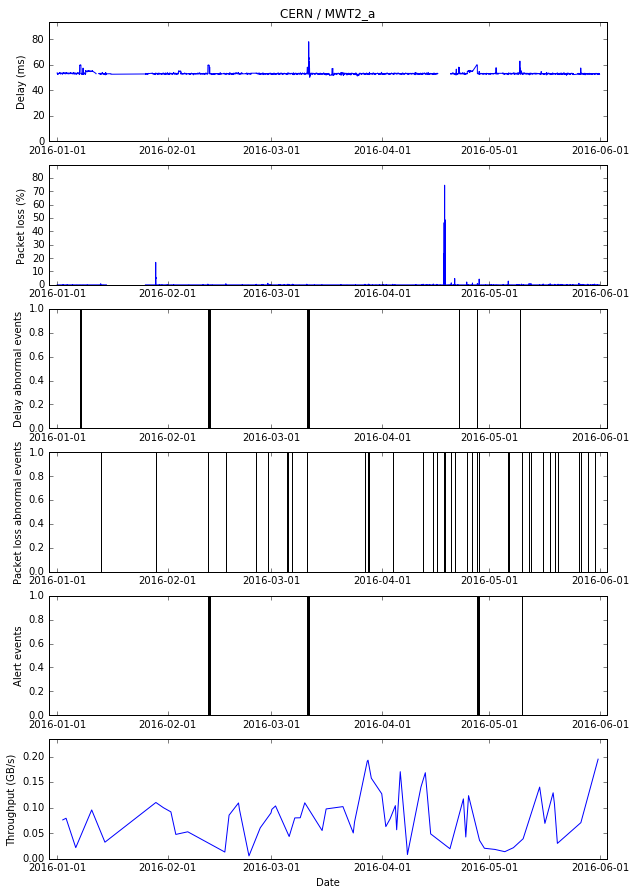

22.  CERN -> MWT2_b


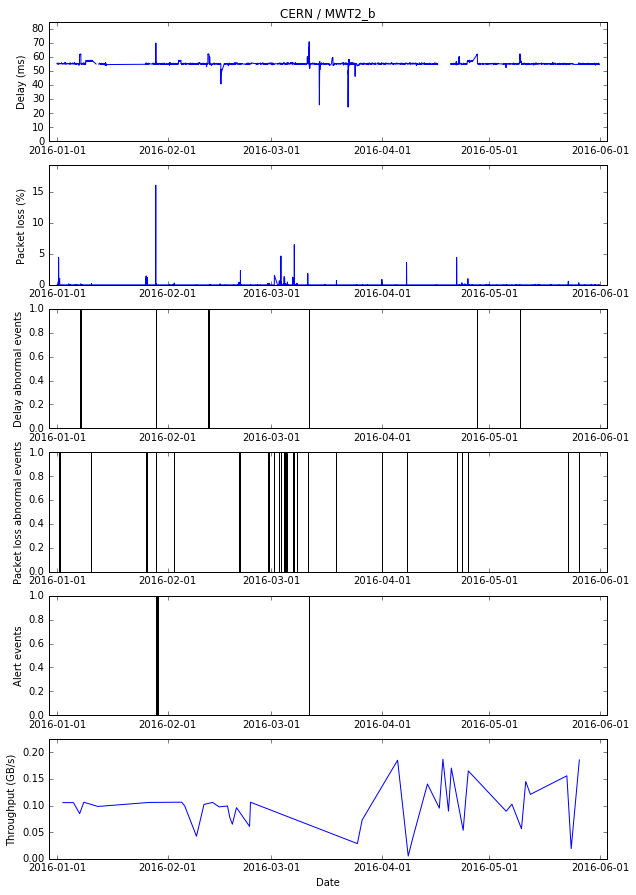

23.  CERN -> MWT2_c


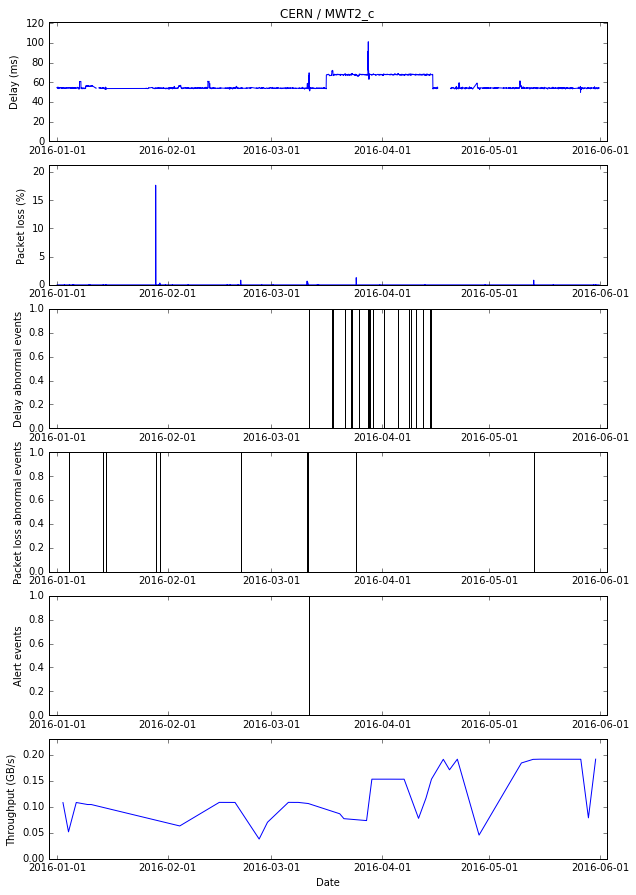

24.  CERN -> SFU


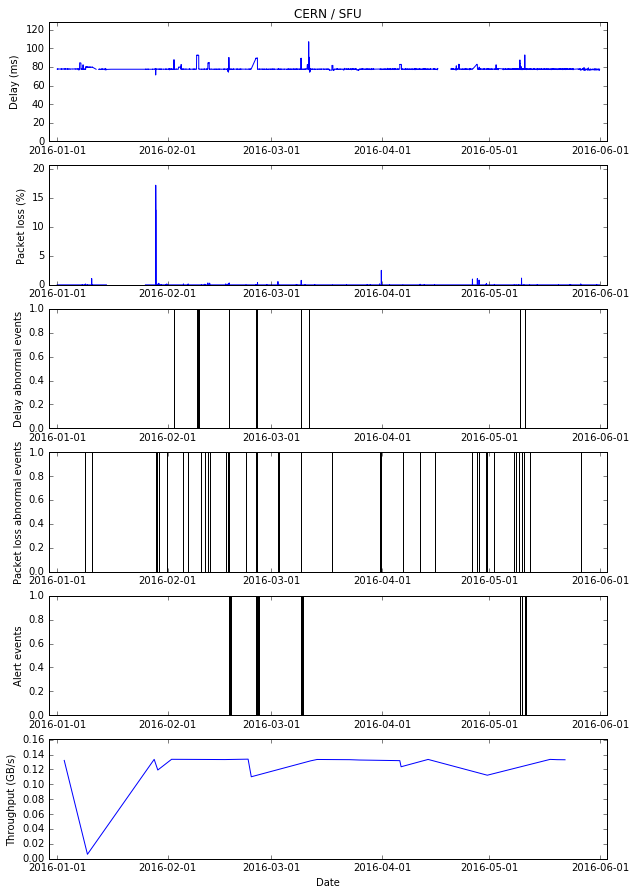

25.  CERN -> BEIJING


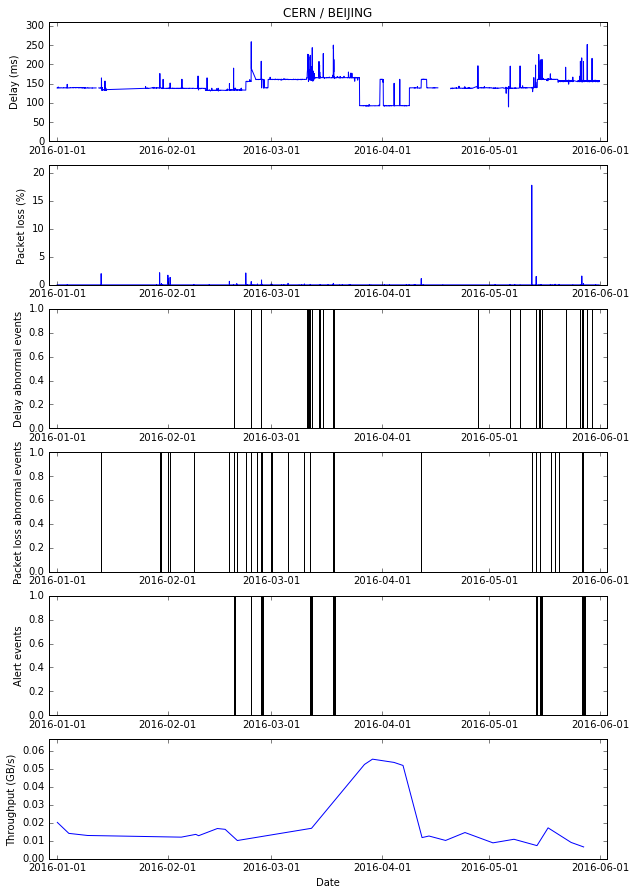

26.  BEIJING -> MWT2_a


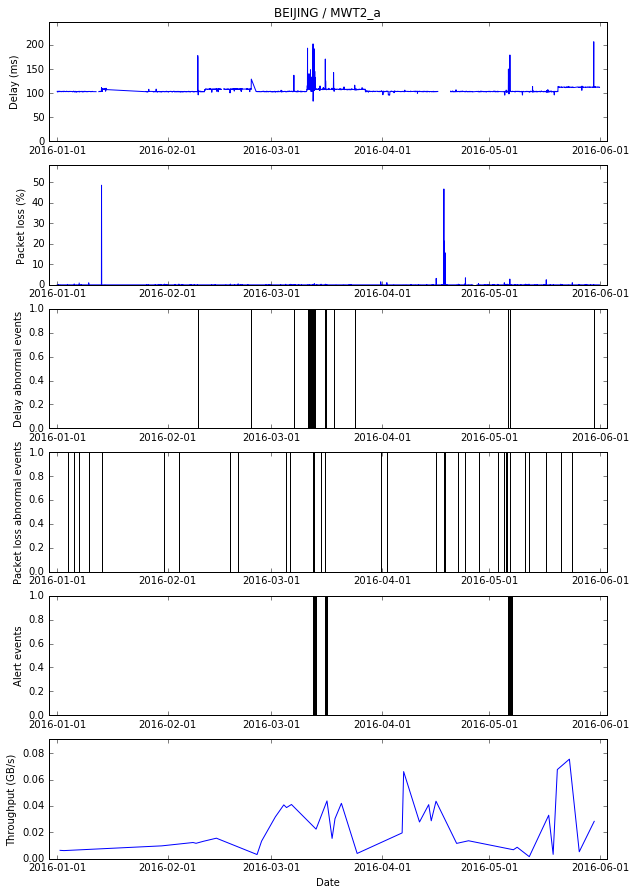

27.  BEIJING -> MWT2_b


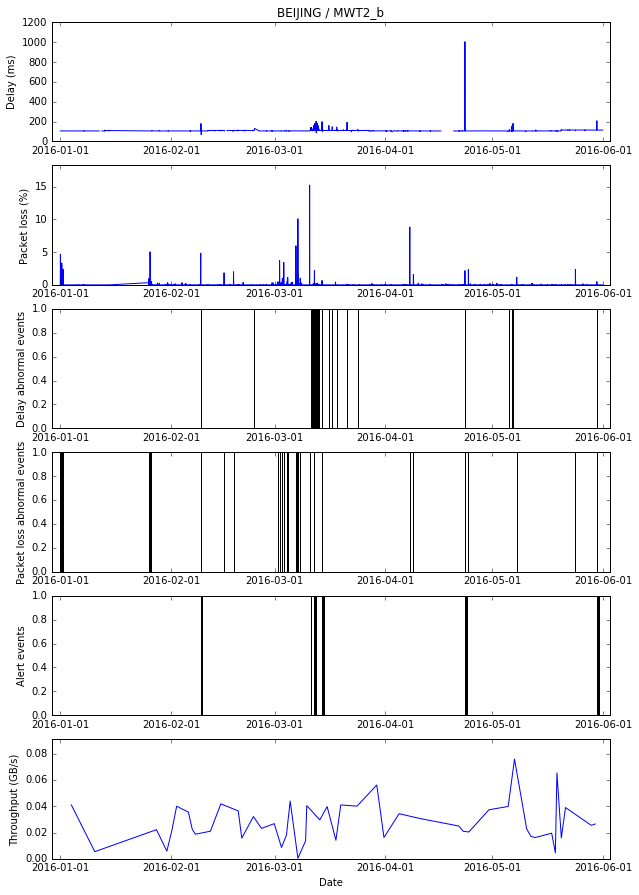

28.  BEIJING -> MWT2_c


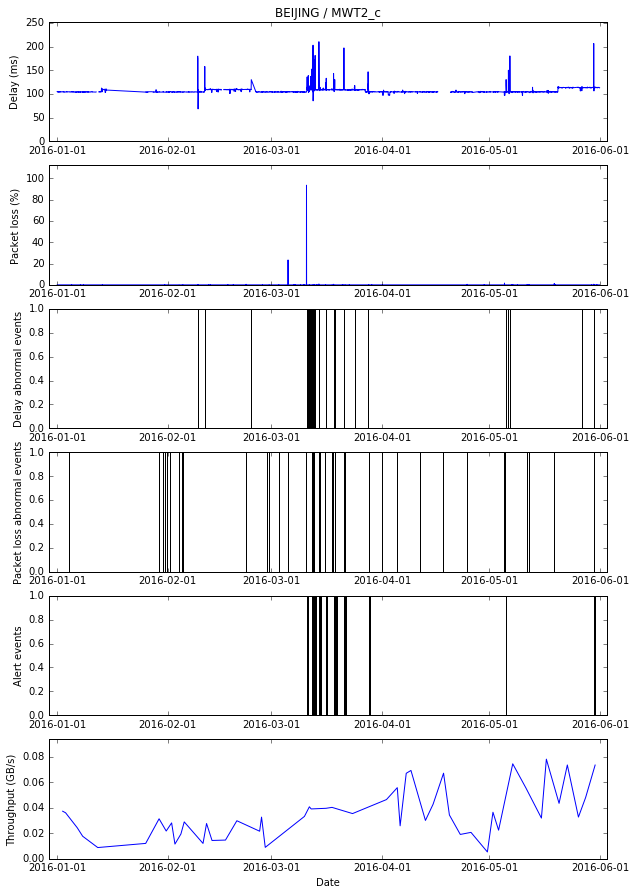

29.  BEIJING -> SFU


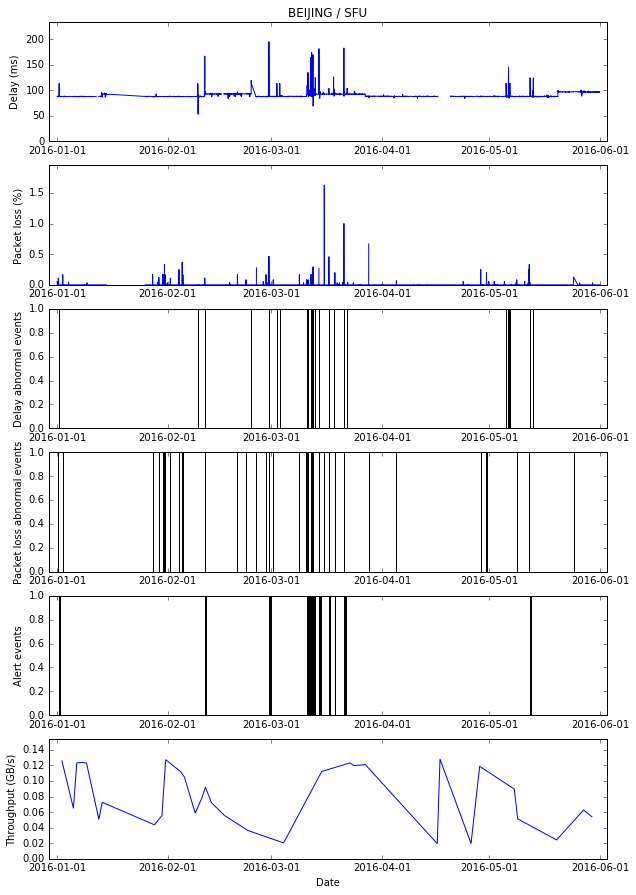

30.  BEIJING -> CERN


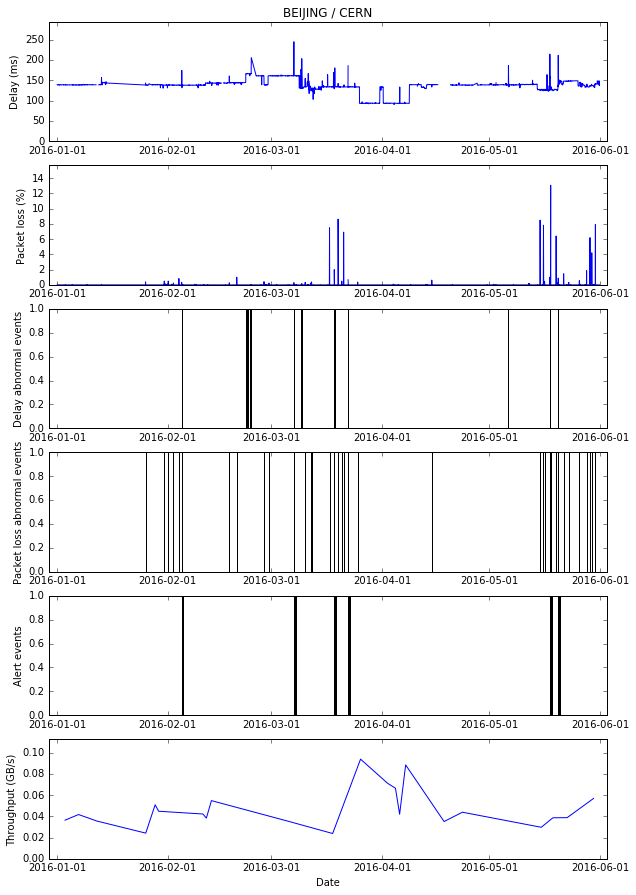

In [81]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            
            
            
            time_window_length = 12 * 60 * 60 * 1000   # 12 hours, half a day, convert hours to ms
#             src_i = 0
#             dest_i = 4
#             data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
#             dm = data_lpl.delay_median
#             pl = data_lpl.packet_loss
            threshold = 0.99
            dm_abnormal_cutoff = dm.quantile(threshold, interpolation='midpoint')
            pl_abnormal_cutoff = pl.quantile(threshold, interpolation='midpoint')
            
            
            
            set_abnormal_dm = set()
            set_abnormal_pl = set()
            set_alert = set()
            
            
            row = data_lpl.shape[0]
            for r in range(row):
                line = data_lpl.iloc[r]
                if line['delay_median'] > dm_abnormal_cutoff:
                    data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', True)
                    set_abnormal_dm.add(data_lpl.index[r])
                else:
                    data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', False)
                if line['packet_loss'] * 100 > pl_abnormal_cutoff:
                    data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', True)
                    set_abnormal_pl.add(data_lpl.index[r])
                else:
                    data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', False)
            
            
            
            
            
            
            
            row = data_lpl.shape[0]
            for r in range(row):
                temp_a = data_lpl[data_lpl.index <= data_lpl.index[r]]
                temp_b = temp_a[temp_a.index >= (data_lpl.index[r] - time_window_length)]
#                 print(temp_b.shape)
#                 if (True in temp_b.delay_abnormal) and (True in temp_b.packet_loss_abnormal):
#                     set_alert.add(data_lpl.index[r])
                if ( temp_b.delay_abnormal[temp_b.delay_abnormal > .5].shape[0] >= 1 ) and ( temp_b.packet_loss_abnormal[temp_b.packet_loss_abnormal > .5].shape[0] >= 1 ):
                    set_alert.add(data_lpl.index[r])
            
            
            
            
            
#             plt.figure(figsize=[10, 6])
            plt.figure(figsize=[10, 15])
            
            plt.subplot(6, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(6, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            
            
            plt.subplot(6, 1, 3)
            for t in set_abnormal_dm:
                plt.axvline(x=t, ymin=0, ymax=1, color='k')
            plt.ylabel('Delay abnormal events')
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            plt.subplot(6, 1, 4)
            for t in set_abnormal_pl:
                plt.axvline(x=t, ymin=0, ymax=1, color='k')
            plt.ylabel('Packet loss abnormal events')
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            plt.subplot(6, 1, 5)
            for t in set_alert:
                plt.axvline(x=t, ymin=0, ymax=1, color='k')
            plt.ylabel('Alert events')
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            
            
            plt.subplot(6, 1, 6)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (GB/s)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()

In [61]:
a = set()
a.add(1)
a.add(3)
a.add(5)
a

{1, 3, 5}

In [64]:
(1 in a) and (2 in a)

False

In [74]:
temp_b

iso_8601  delay_median  delay_mean   delay_sd  \
1459717200000  2016-04-03T21:00:00           1.5    1.636000   1.880072   
1459717500000  2016-04-03T21:05:00           1.6    1.584667   0.104713   
1459718700000  2016-04-03T21:25:00           1.7    1.714889   0.848267   
1459719000000  2016-04-03T21:30:00           1.6    1.682267   2.608683   
1459719900000  2016-04-03T21:45:00           1.5    1.543000   0.089851   
1459720500000  2016-04-03T21:55:00           1.5    1.474667   0.069461   
1459721400000  2016-04-03T22:10:00           1.5    1.478000   0.072911   
1459722600000  2016-04-03T22:30:00           1.5    1.712333   3.649504   
1459723200000  2016-04-03T22:40:00           1.6    1.652778   0.112364   
1459723500000  2016-04-03T22:45:00           1.6    1.632167   0.120894   
1459724700000  2016-04-03T23:05:00           1.5    1.501286   0.095883   
1459725000000  2016-04-03T23:10:00           1.6    1.670680   0.336521   
1459725600000  2016-04-03T23:20:00           1.8    2.548852  19.733725   
1459726200000  2016-04-03T23:30:00           1.8    2.069037   6.489839   
1459726500000  2016-04-03T23:35:00           1.8    1.837208   0.541190   
1459727400000  2016-04-03T23:50:00           1.9    1.926917   0.108015   
1459727700000  2016-04-03T23:55:00           1.6    1.663333   0.112497   
1459728000000  2016-04-04T00:00:00           1.8    1.754444   0.140484   
1459729200000  2016-04-04T00:20:00           1.9    1.911000   0.087630   
1459729800000  2016-04-04T00:30:00           1.7    1.826067   2.183720   
1459730400000  2016-04-04T00:40:00           1.8    1.828917   0.089938   
1459730700000  2016-04-04T00:45:00           1.7    3.253000  21.064002   
1459731300000  2016-04-04T00:55:00           1.8    1.779095   0.086278   
1459731600000  2016-04-04T01:00:00           1.8    2.932148  23.071297   
1459731900000  2016-04-04T01:05:00           1.7    1.710125   0.101907   
1459732800000  2016-04-04T01:20:00           1.7    1.754667   0.117381   
1459733100000  2016-04-04T01:25:00           1.7    1.837333   2.182195   
1459733400000  2016-04-04T01:30:00           1.8    1.782500   0.110047   
1459734300000  2016-04-04T01:45:00           1.8    2.040381   4.941985   
1459734600000  2016-04-04T01:50:00           1.8    2.271000   9.843745   
...                            ...           ...         ...        ...   
1459787100000  2016-04-04T16:25:00           1.8    4.040167  30.351465   
1459787700000  2016-04-04T16:35:00           1.5    1.500583   0.101446   
1459788000000  2016-04-04T16:40:00           1.5    1.762111   7.319715   
1459788300000  2016-04-04T16:45:00           1.5    1.604889   2.470299   
1459789200000  2016-04-04T17:00:00           1.5    1.504889   0.113424   
1459789500000  2016-04-04T17:05:00           1.6    1.613928   0.656111   
1459790400000  2016-04-04T17:20:00           1.6    1.702417   3.618002   
1459791300000  2016-04-04T17:35:00           1.5    1.540190   0.636362   
1459791600000  2016-04-04T17:40:00           1.5    1.531333   0.099507   
1459791900000  2016-04-04T17:45:00           1.8    2.099233   7.595581   
1459792800000  2016-04-04T18:00:00           1.8    1.909444   2.762698   
1459793100000  2016-04-04T18:05:00           1.9    2.167333   6.275491   
1459793400000  2016-04-04T18:10:00           1.8    1.748267   0.208735   
1459794000000  2016-04-04T18:20:00           1.5    1.488000   0.110506   
1459794600000  2016-04-04T18:30:00           1.8    1.820905   0.104180   
1459794900000  2016-04-04T18:35:00           1.8    1.777944   0.114974   
1459795500000  2016-04-04T18:45:00           1.7    1.736667   0.107031   
1459796100000  2016-04-04T18:55:00           2.1    2.954400  17.874685   
1459796400000  2016-04-04T19:00:00           2.1    3.236974  21.246087   
1459796700000  2016-04-04T19:05:00           2.1    2.092750   0.318024   
1459797600000  2016-04-04T19:20:00           2.1    2.115733   0.672542   
1459797900000  2016-04-04T19:25:00           1.8   

In [79]:
temp_b.packet_loss_abnormal[temp_b.packet_loss_abnormal > .5].shape[0] >= 1

3

1.  MWT2_a -> MWT2_b


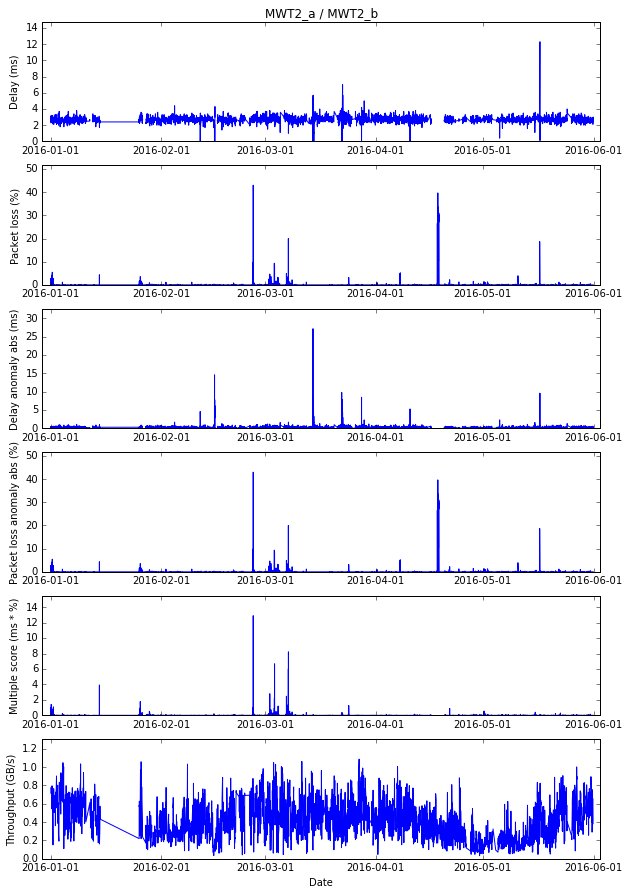

2.  MWT2_a -> MWT2_c


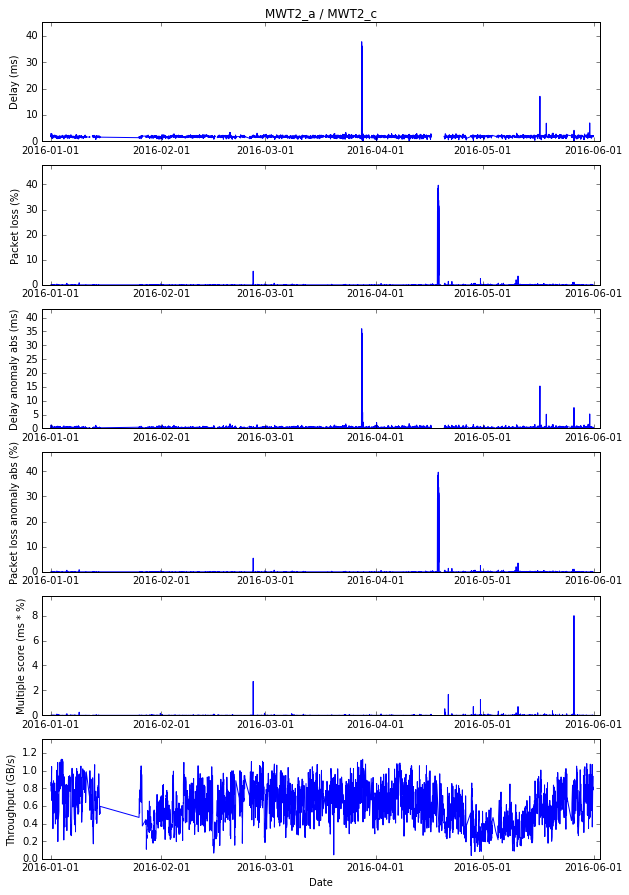

3.  MWT2_a -> SFU


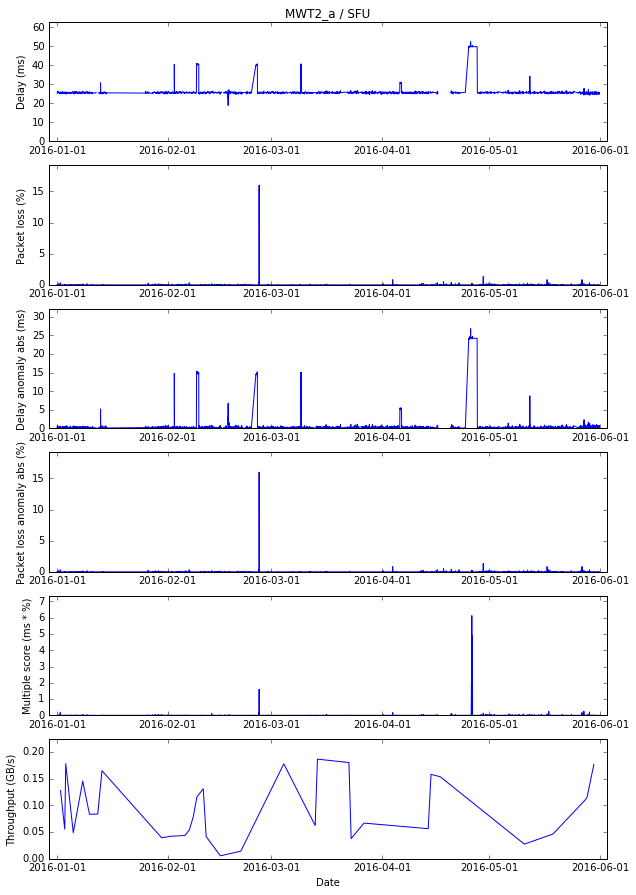

4.  MWT2_a -> CERN


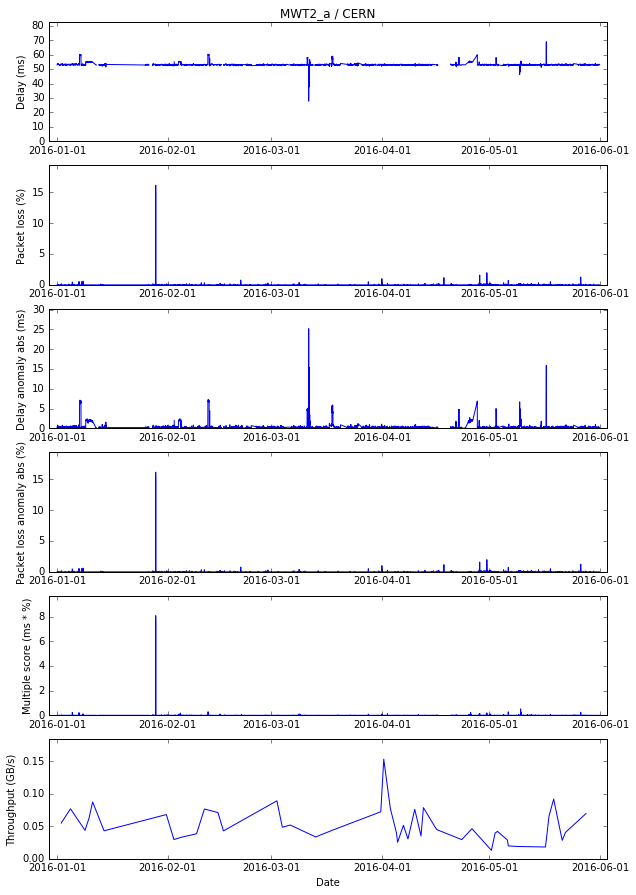

5.  MWT2_a -> BEIJING


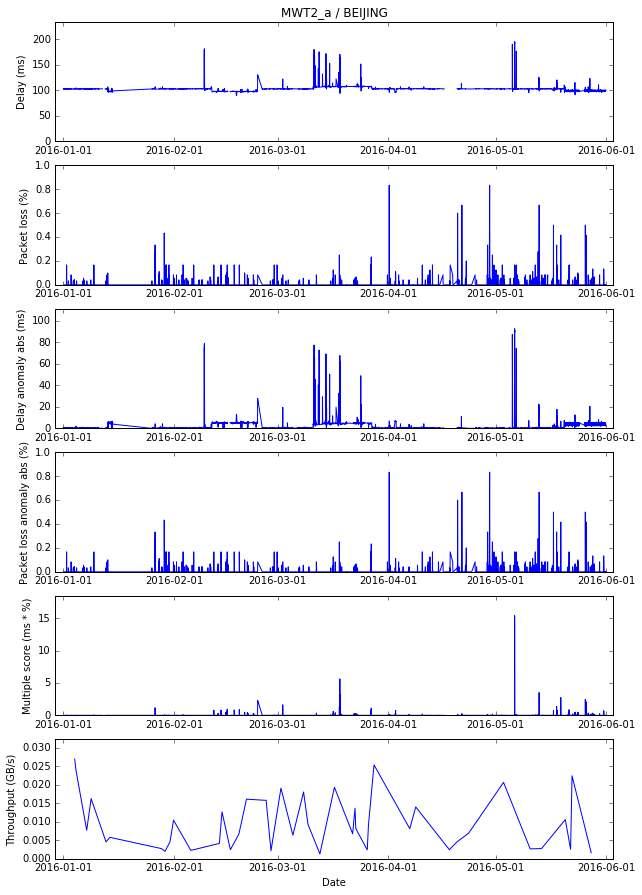

6.  MWT2_b -> MWT2_a


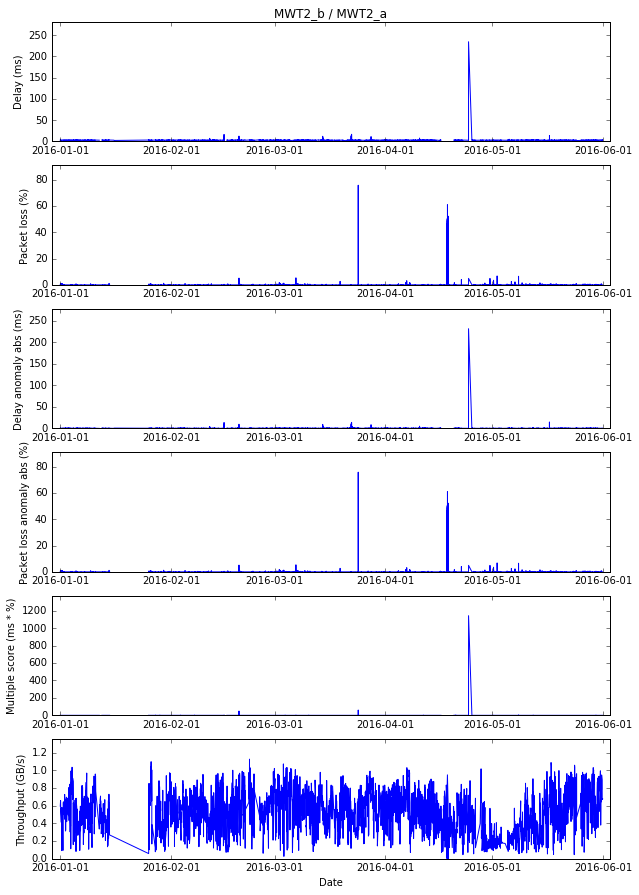

7.  MWT2_b -> MWT2_c


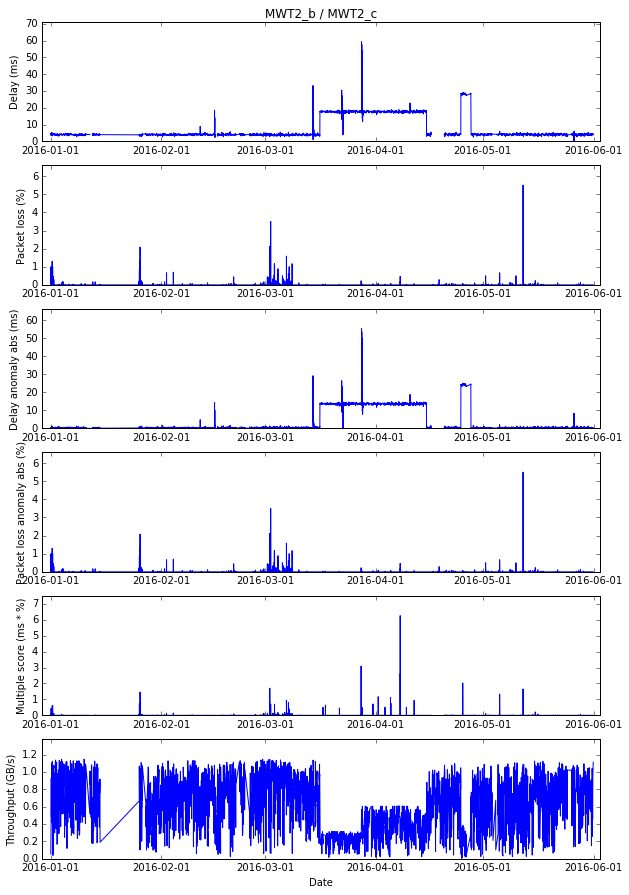

8.  MWT2_b -> SFU


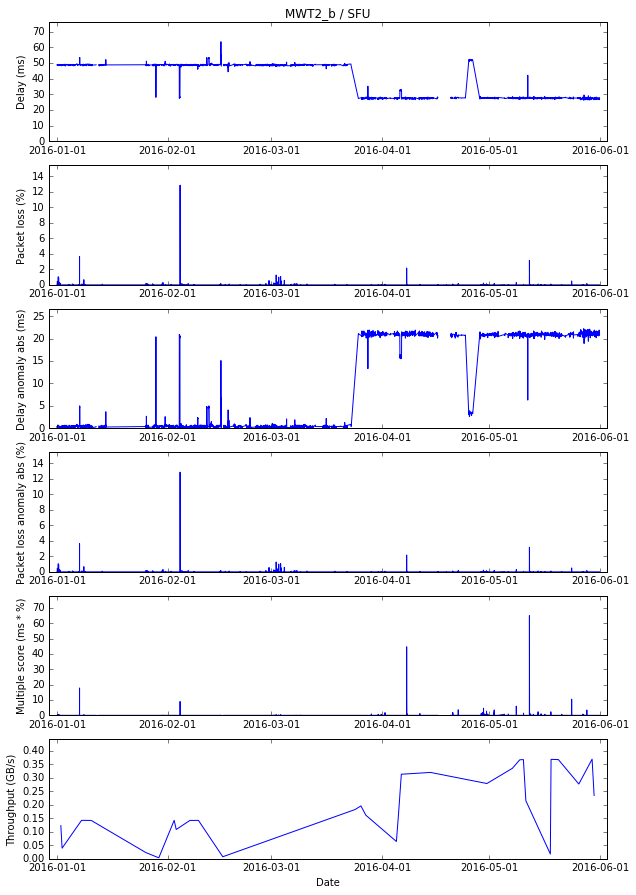

9.  MWT2_b -> CERN


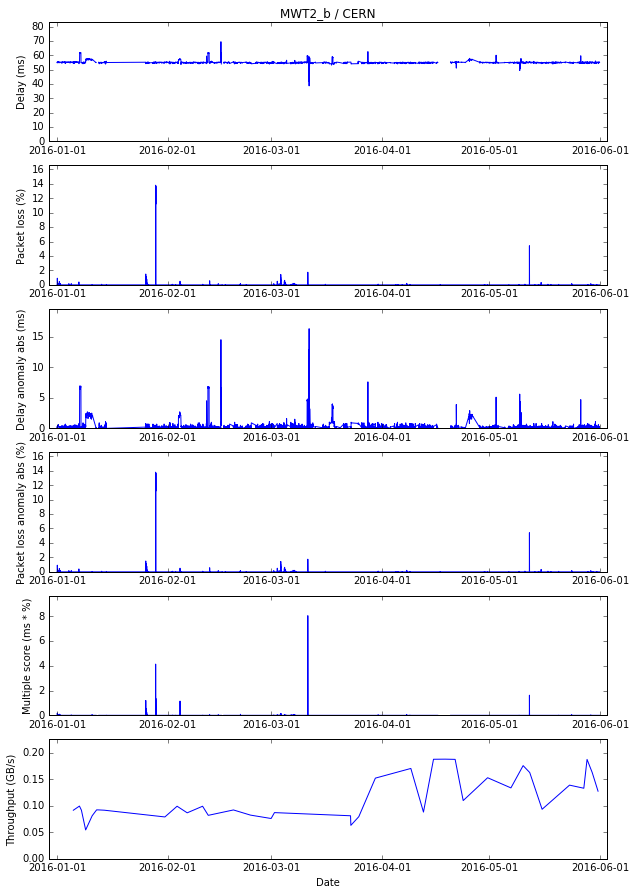

10.  MWT2_b -> BEIJING


11.  MWT2_c -> MWT2_a


12.  MWT2_c -> MWT2_b


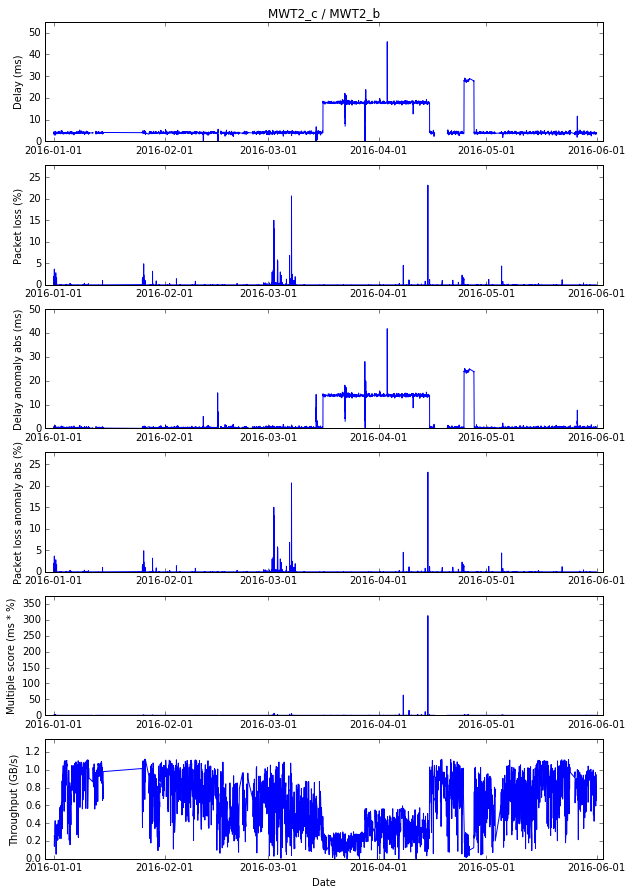

13.  MWT2_c -> SFU


14.  MWT2_c -> CERN


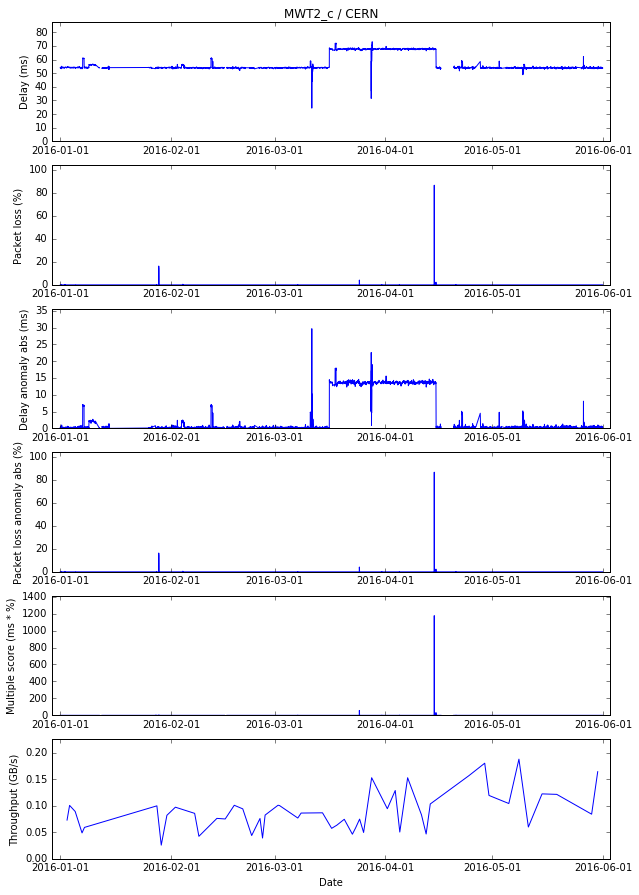

15.  MWT2_c -> BEIJING


16.  SFU -> MWT2_a


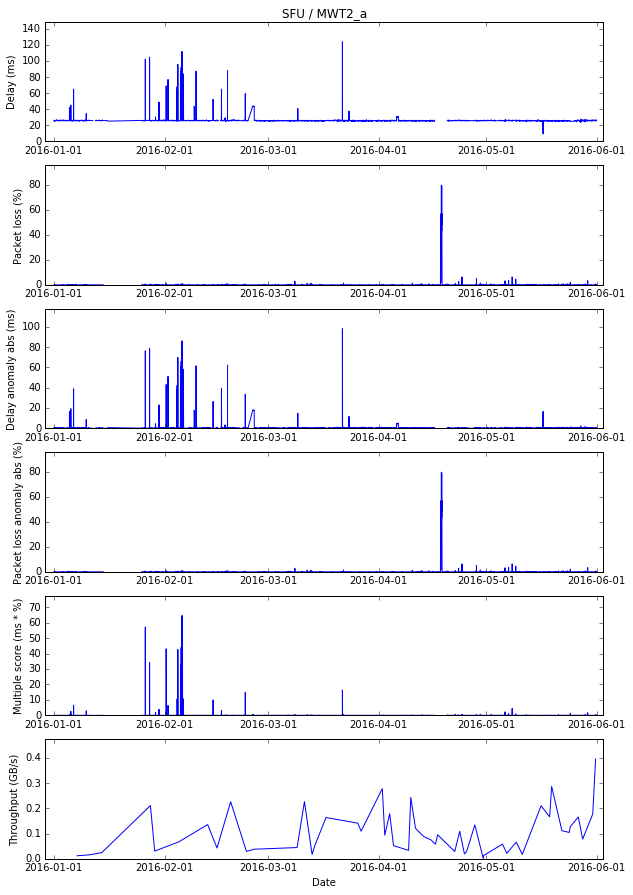

17.  SFU -> MWT2_b


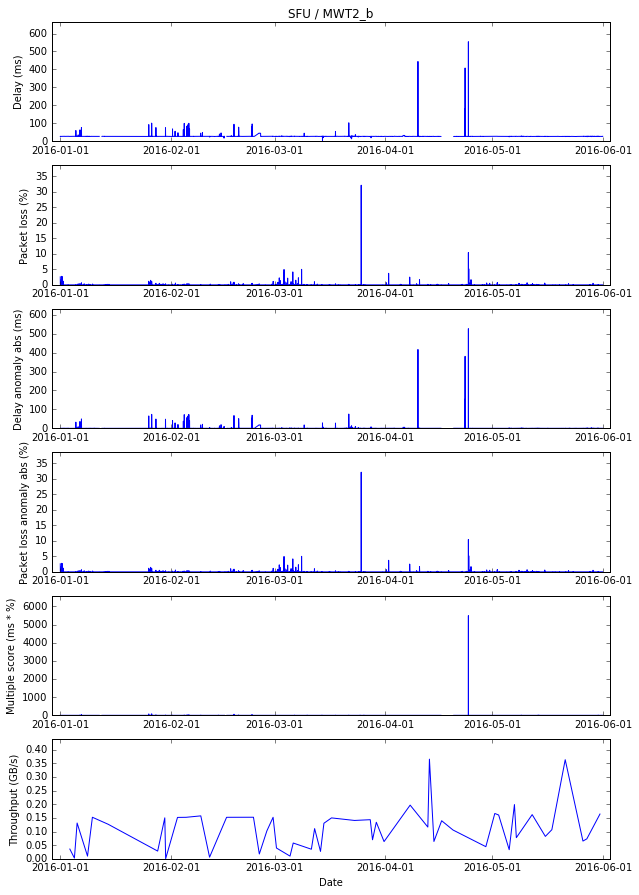

18.  SFU -> MWT2_c


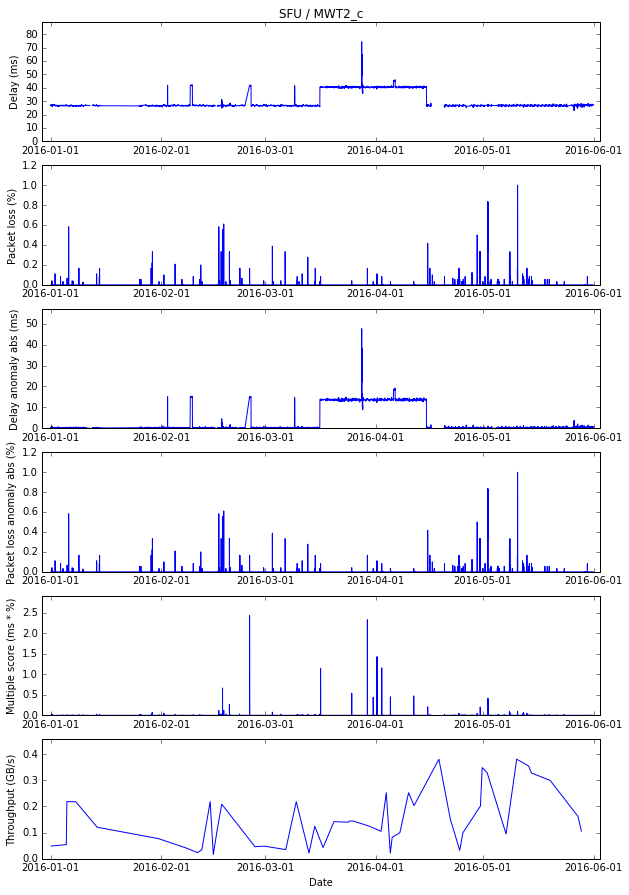

19.  SFU -> CERN


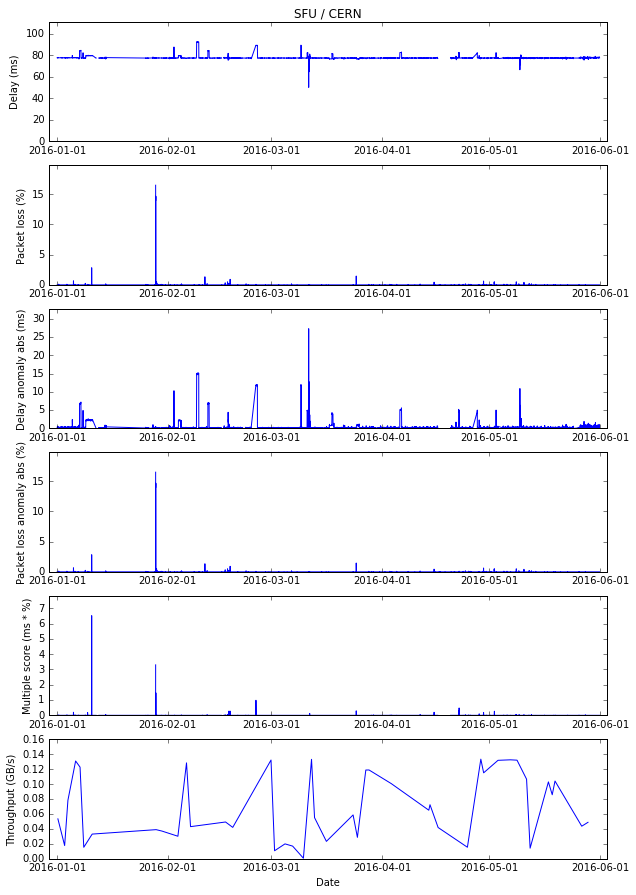

20.  SFU -> BEIJING


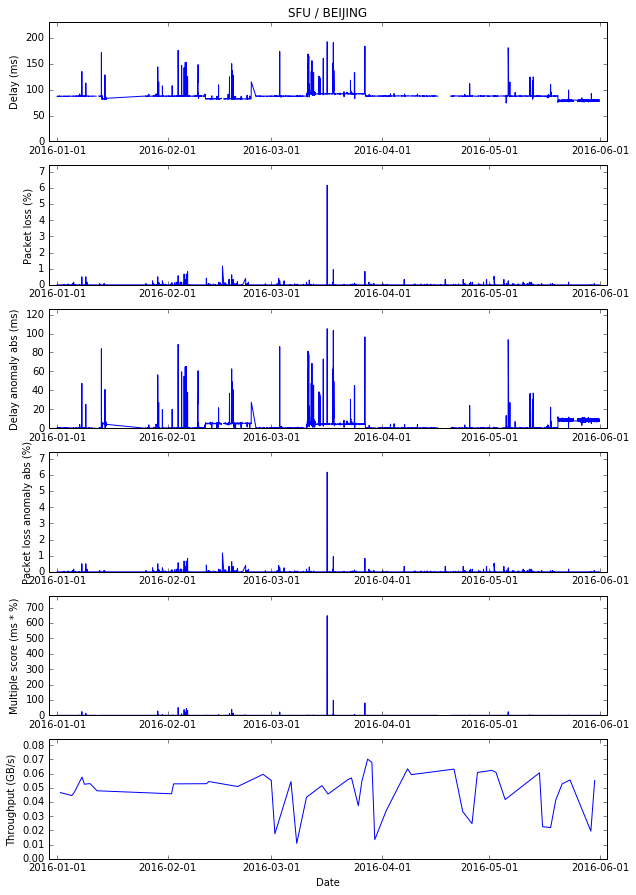

21.  CERN -> MWT2_a


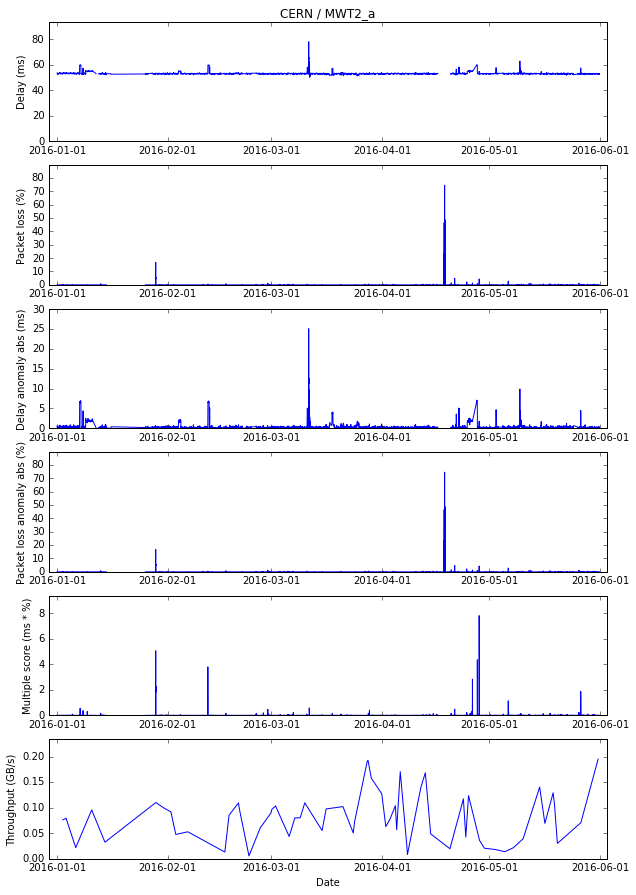

22.  CERN -> MWT2_b


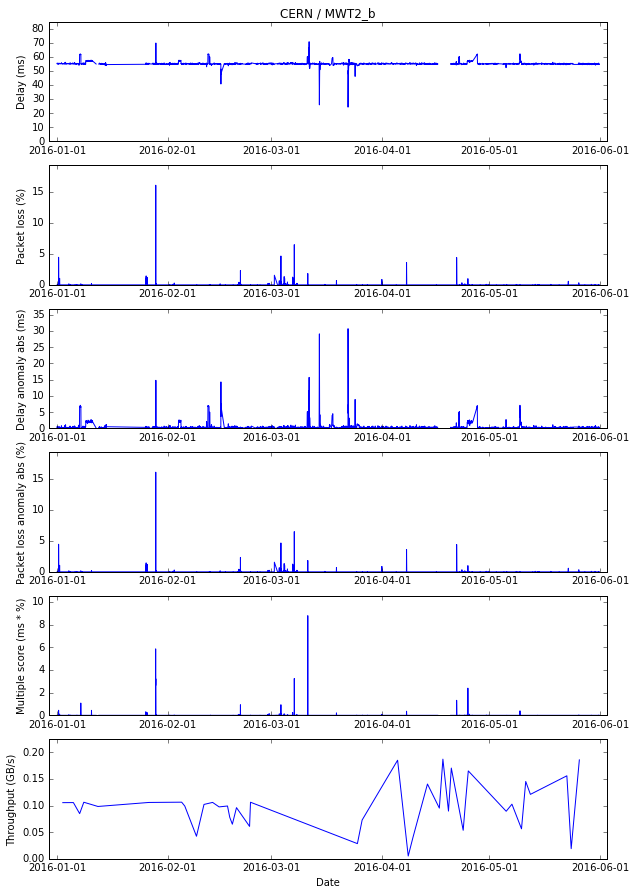

23.  CERN -> MWT2_c


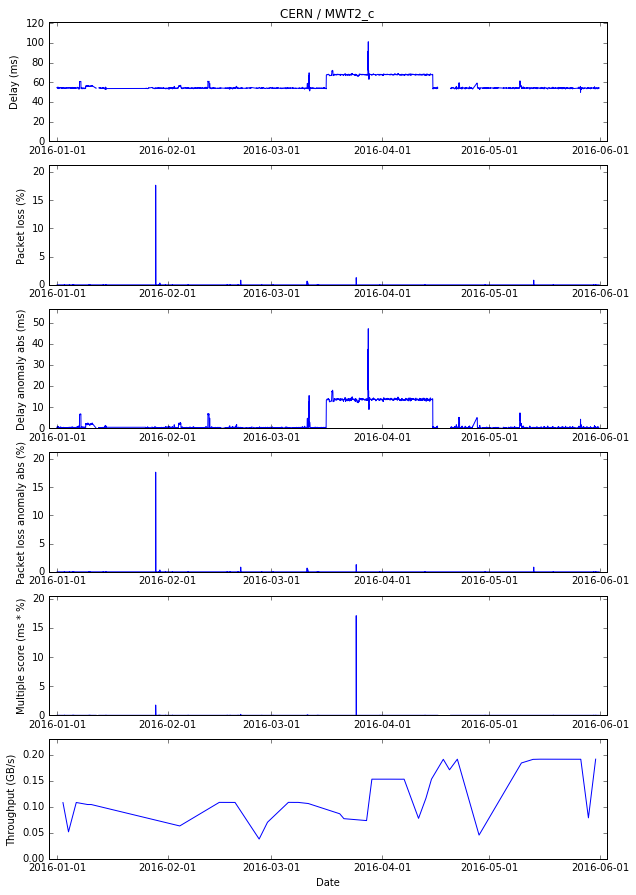

24.  CERN -> SFU


25.  CERN -> BEIJING


26.  BEIJING -> MWT2_a


27.  BEIJING -> MWT2_b


28.  BEIJING -> MWT2_c


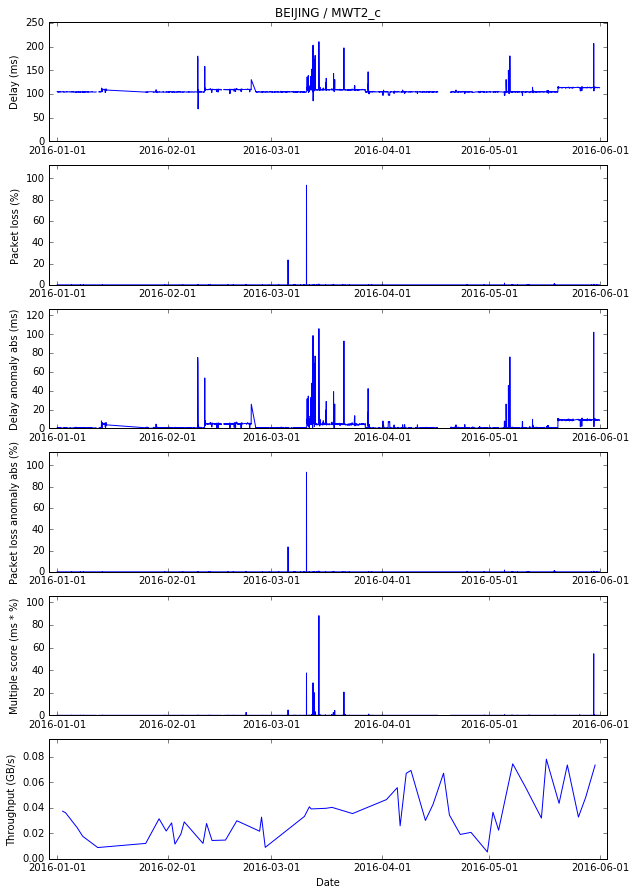

29.  BEIJING -> SFU


30.  BEIJING -> CERN


In [84]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            
            
            
            time_window_length = 12 * 60 * 60 * 1000   # 12 hours, half a day, convert hours to ms
#             threshold = 0.99
#             dm_abnormal_cutoff = dm.quantile(threshold, interpolation='midpoint')
#             pl_abnormal_cutoff = pl.quantile(threshold, interpolation='midpoint')

            dm_median = dm.median()
            pl_median = pl.median()
            
            
            row = data_lpl.shape[0]
            for r in range(row):
                line = data_lpl.iloc[r]
                value1 = abs(line['delay_median'] - dm_median)
                value2 = abs(line['packet_loss'] * 100 - pl_median)
                data_lpl.set_value(data_lpl.index[r], 'delay_anml_abs', value1)
                data_lpl.set_value(data_lpl.index[r], 'packet_loss_anml_abs', value2)
                data_lpl.set_value(data_lpl.index[r], 'multiple_score', value1 * value2)
                
            
            
            
#             set_abnormal_dm = set()
#             set_abnormal_pl = set()
#             set_alert = set()
            
            
#             row = data_lpl.shape[0]
#             for r in range(row):
#                 line = data_lpl.iloc[r]
#                 if line['delay_median'] > dm_abnormal_cutoff:
#                     data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', True)
#                     set_abnormal_dm.add(data_lpl.index[r])
#                 else:
#                     data_lpl.set_value(data_lpl.index[r], 'delay_abnormal', False)
#                 if line['packet_loss'] * 100 > pl_abnormal_cutoff:
#                     data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', True)
#                     set_abnormal_pl.add(data_lpl.index[r])
#                 else:
#                     data_lpl.set_value(data_lpl.index[r], 'packet_loss_abnormal', False)
            
            
            
            
            
            
            
#             row = data_lpl.shape[0]
#             for r in range(row):
#                 temp_a = data_lpl[data_lpl.index <= data_lpl.index[r]]
#                 temp_b = temp_a[temp_a.index >= (data_lpl.index[r] - time_window_length)]
#                 if ( temp_b.delay_abnormal[temp_b.delay_abnormal > .5].shape[0] >= 1 ) and ( temp_b.packet_loss_abnormal[temp_b.packet_loss_abnormal > .5].shape[0] >= 1 ):
#                     set_alert.add(data_lpl.index[r])
            
            
            
            
            
#             plt.figure(figsize=[10, 6])
            plt.figure(figsize=[10, 15])
            
            plt.subplot(6, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(6, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            
            
#             plt.subplot(6, 1, 3)
#             for t in set_abnormal_dm:
#                 plt.axvline(x=t, ymin=0, ymax=1, color='k')
#             plt.ylabel('Delay abnormal events')
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            
#             plt.subplot(6, 1, 4)
#             for t in set_abnormal_pl:
#                 plt.axvline(x=t, ymin=0, ymax=1, color='k')
#             plt.ylabel('Packet loss abnormal events')
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            
#             plt.subplot(6, 1, 5)
#             for t in set_alert:
#                 plt.axvline(x=t, ymin=0, ymax=1, color='k')
#             plt.ylabel('Alert events')
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)


            plt.subplot(6, 1, 3)
            plt.plot(time_lpl, data_lpl.delay_anml_abs, label='Delay anomaly abs (ms)')
            plt.ylabel('Delay anomaly abs (ms)')
            plt.ylim([0, data_lpl.delay_anml_abs.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            
            plt.subplot(6, 1, 4)
            plt.plot(time_lpl, data_lpl.packet_loss_anml_abs, label='Packet loss anomaly abs (%)')
            plt.ylabel('Packet loss anomaly abs (%)')
            plt.ylim([0, data_lpl.packet_loss_anml_abs.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            
            plt.subplot(6, 1, 5)
            plt.plot(time_lpl, data_lpl.multiple_score, label='Multiple score (ms * %)')
            plt.ylabel('Multiple score (ms * %)')
            plt.ylim([0, data_lpl.multiple_score.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)

            
            
            
            
            plt.subplot(6, 1, 6)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (GB/s)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()

In [83]:
abs(-96)

96

In [85]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            
            
            
            time_window_length = 12 * 60 * 60 * 1000   # 12 hours, half a day, convert hours to ms

            dm_median = dm.median()
            pl_median = pl.median()
            
            dm_std = dm.std()
            pl_std = pl.std()
            print('delay std dev = {}'.format(dm_std))
            print('packet loss std dev = {}'.format(pl_std))
            
            
#             row = data_lpl.shape[0]
#             for r in range(row):
#                 line = data_lpl.iloc[r]
#                 value1 = abs(line['delay_median'] - dm_median)
#                 value2 = abs(line['packet_loss'] * 100 - pl_median)
#                 data_lpl.set_value(data_lpl.index[r], 'delay_anml_abs', value1)
#                 data_lpl.set_value(data_lpl.index[r], 'packet_loss_anml_abs', value2)
#                 data_lpl.set_value(data_lpl.index[r], 'multiple_score', value1 * value2)
                
            
#             plt.figure(figsize=[10, 15])
            
#             plt.subplot(6, 1, 1)
#             plt.plot(time_lpl, dm, label='delay (ms)')
#             plt.ylabel('Delay (ms)')
#             plt.ylim([0, dm.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
#             plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
#             plt.subplot(6, 1, 2)
#             plt.plot(time_lpl, pl, label='packet loss (%)')
#             plt.ylabel('Packet loss (%)')
#             plt.ylim([0, pl.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            


#             plt.subplot(6, 1, 3)
#             plt.plot(time_lpl, data_lpl.delay_anml_abs, label='Delay anomaly abs (ms)')
#             plt.ylabel('Delay anomaly abs (ms)')
#             plt.ylim([0, data_lpl.delay_anml_abs.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            
            
#             plt.subplot(6, 1, 4)
#             plt.plot(time_lpl, data_lpl.packet_loss_anml_abs, label='Packet loss anomaly abs (%)')
#             plt.ylabel('Packet loss anomaly abs (%)')
#             plt.ylim([0, data_lpl.packet_loss_anml_abs.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            
            
#             plt.subplot(6, 1, 5)
#             plt.plot(time_lpl, data_lpl.multiple_score, label='Multiple score (ms * %)')
#             plt.ylabel('Multiple score (ms * %)')
#             plt.ylim([0, data_lpl.multiple_score.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)

            
            
            
            
#             plt.subplot(6, 1, 6)
#             plt.plot(time_t, tp, label='throughput (GB/s)')
#             plt.ylabel('Throughput (GB/s)')
#             plt.ylim([0, tp.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
#             plt.xlabel('Date')
            
#             plt.show()

1.  MWT2_a -> MWT2_b
delay std dev = 0.48920844723829054
packet loss std dev = 1.2271793571884273
2.  MWT2_a -> MWT2_c
delay std dev = 0.7984309337852659
packet loss std dev = 0.9844631660596794
3.  MWT2_a -> SFU
delay std dev = 2.626957122535643
packet loss std dev = 0.22512300580919656
4.  MWT2_a -> CERN
delay std dev = 0.9859244568791566
packet loss std dev = 0.3616030942544076
5.  MWT2_a -> BEIJING
delay std dev = 6.381121420052745
packet loss std dev = 0.03455545611747674
6.  MWT2_b -> MWT2_a
delay std dev = 1.8997433749305688
packet loss std dev = 1.7273682922616382
7.  MWT2_b -> MWT2_c
delay std dev = 6.124292094248104
packet loss std dev = 0.07015402456546795
8.  MWT2_b -> SFU
delay std dev = 10.597953992197956
packet loss std dev = 0.1753404257554306
9.  MWT2_b -> CERN
delay std dev = 0.9442323523099029
packet loss std dev = 0.2901342021122825
10.  MWT2_b -> BEIJING
delay std dev = 6.486717578092377
packet loss std dev = 0.13887323844118055
11.  MWT2_c -> MWT2_a
delay std dev 

1.  MWT2_a -> MWT2_b


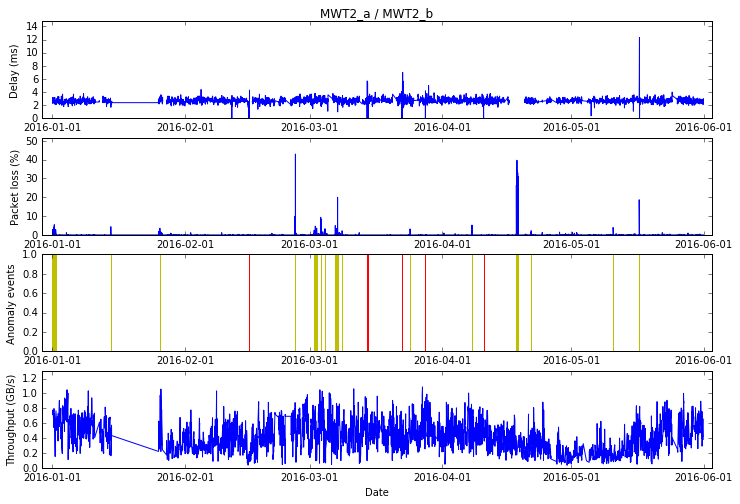

2.  MWT2_a -> MWT2_c


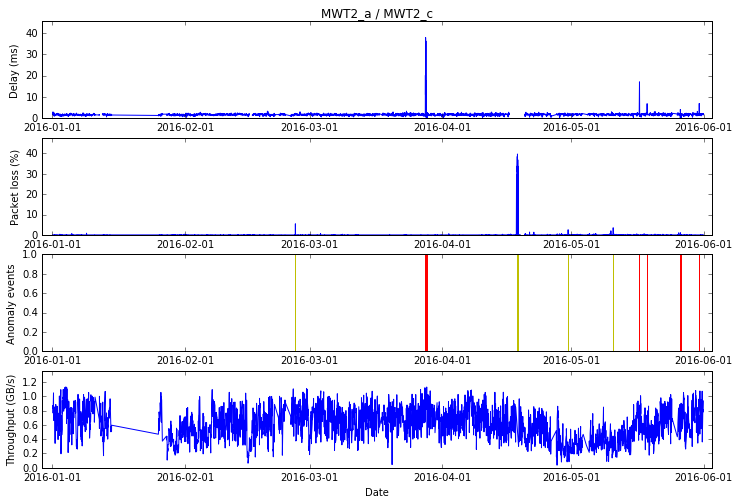

3.  MWT2_a -> SFU


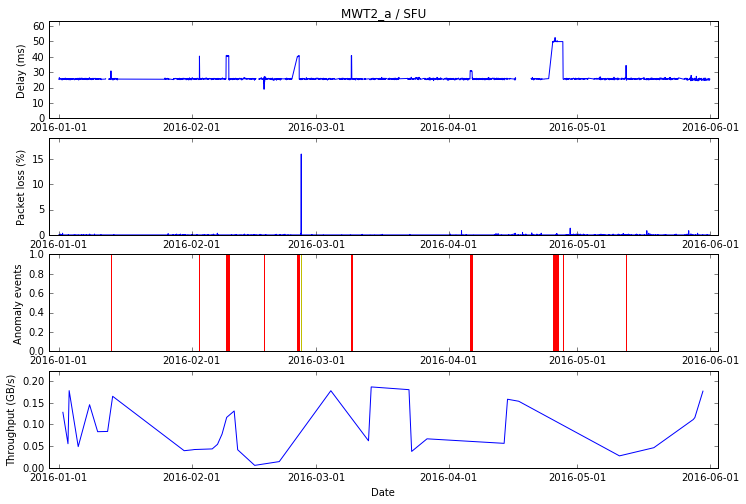

4.  MWT2_a -> CERN


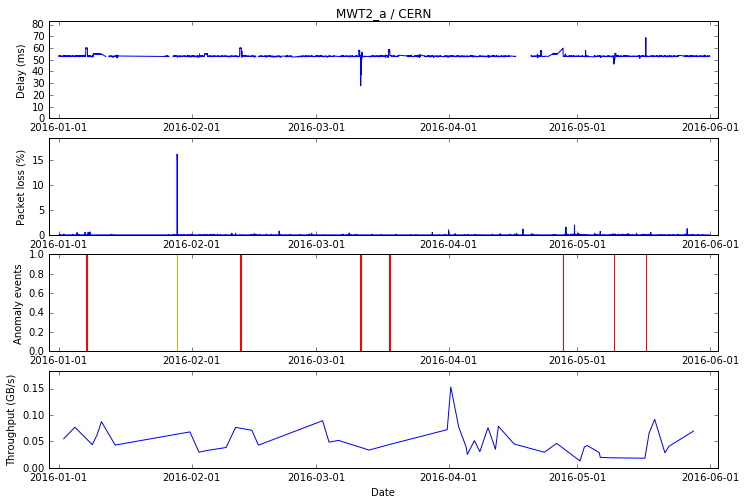

5.  MWT2_a -> BEIJING


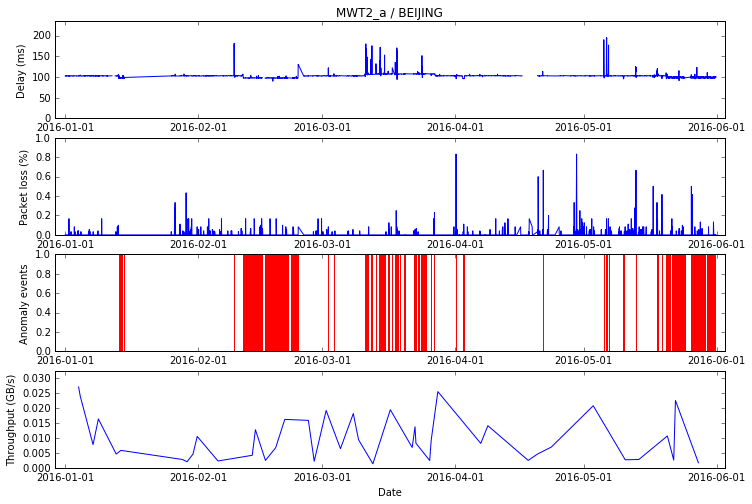

6.  MWT2_b -> MWT2_a


7.  MWT2_b -> MWT2_c


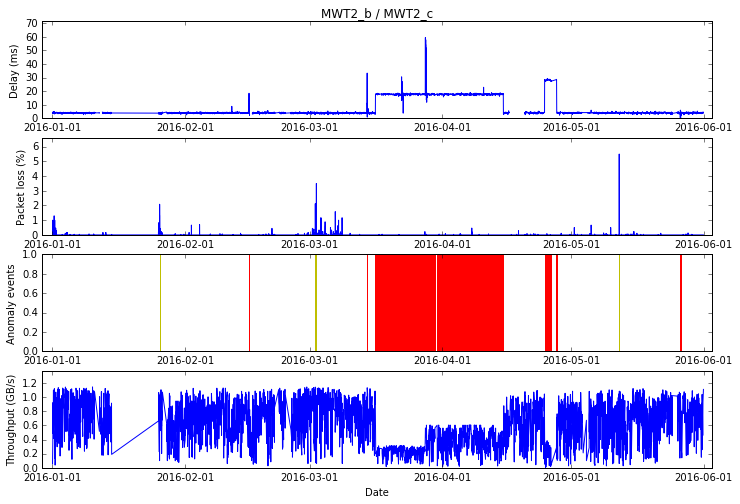

8.  MWT2_b -> SFU


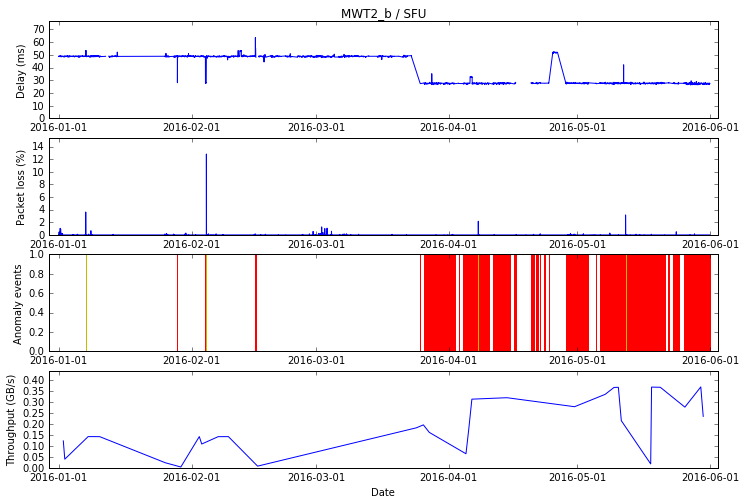

9.  MWT2_b -> CERN


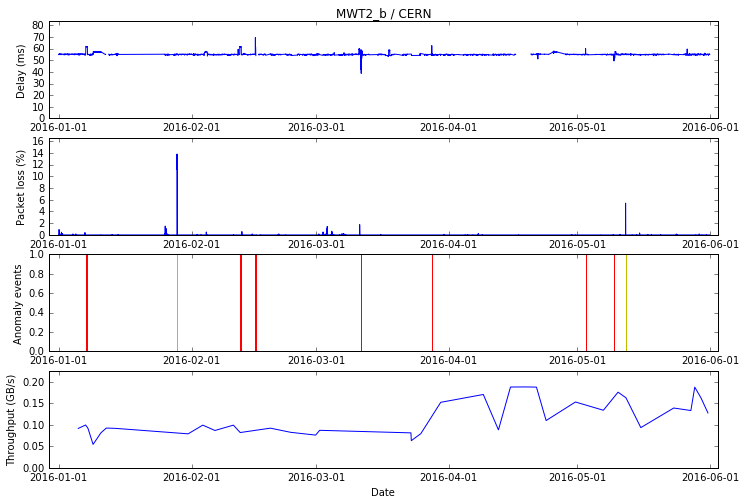

10.  MWT2_b -> BEIJING


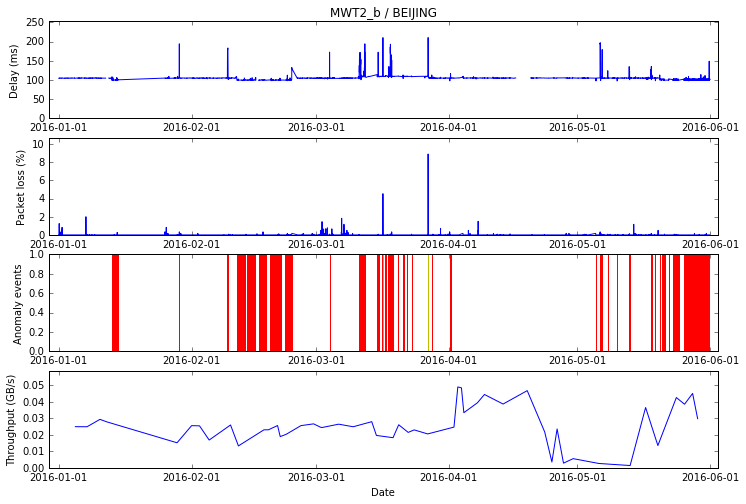

11.  MWT2_c -> MWT2_a


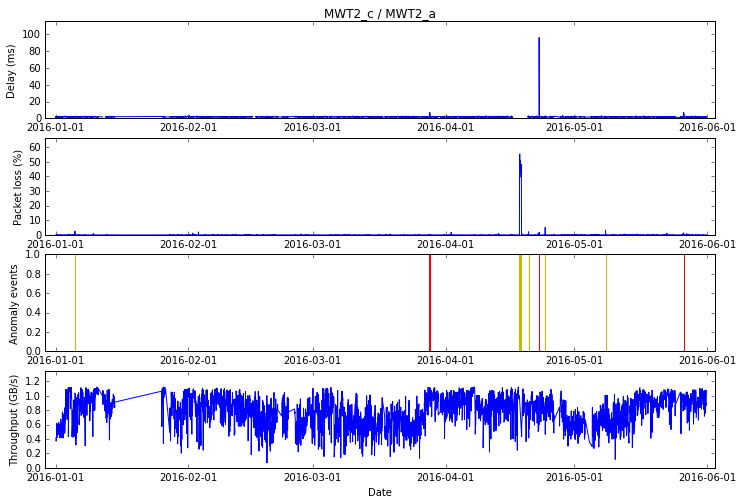

12.  MWT2_c -> MWT2_b


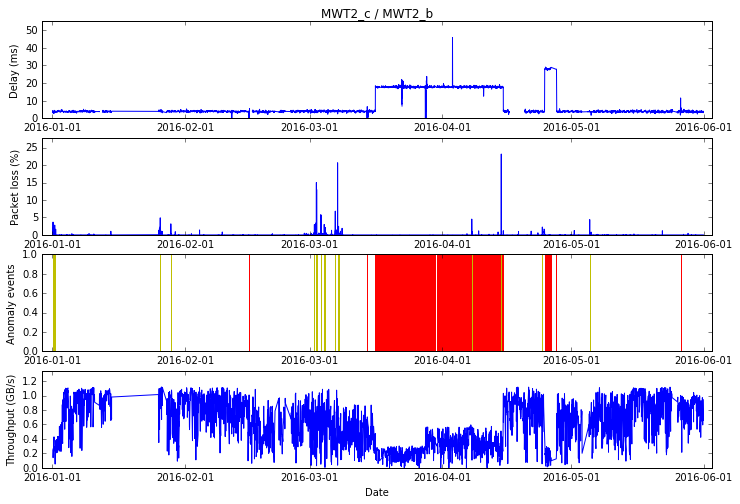

13.  MWT2_c -> SFU


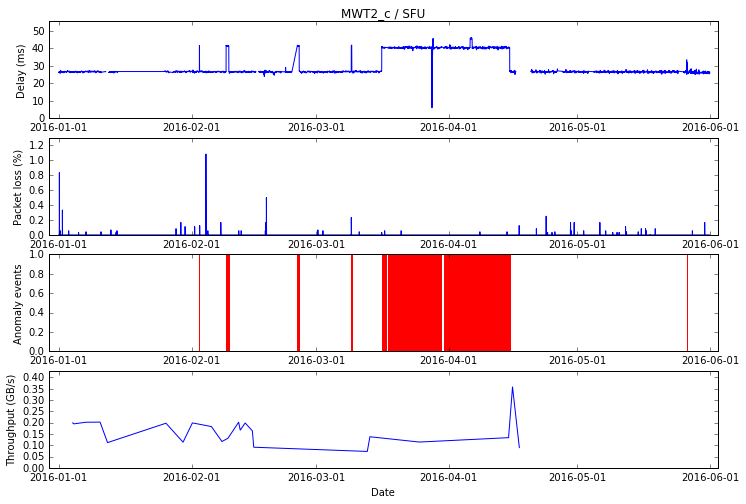

14.  MWT2_c -> CERN


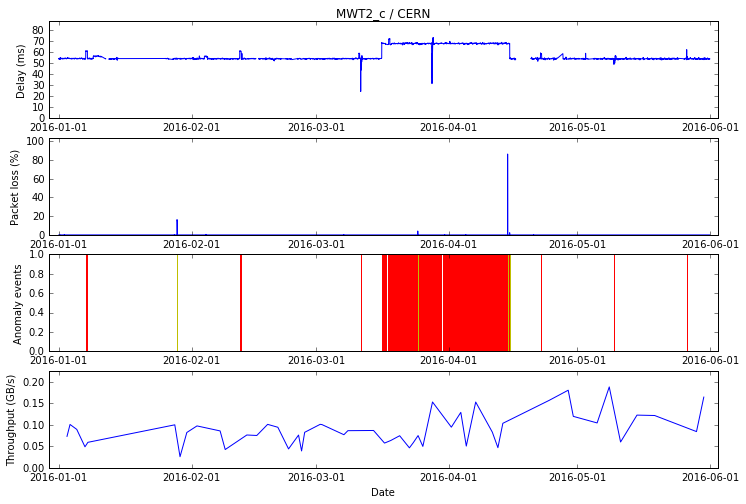

15.  MWT2_c -> BEIJING


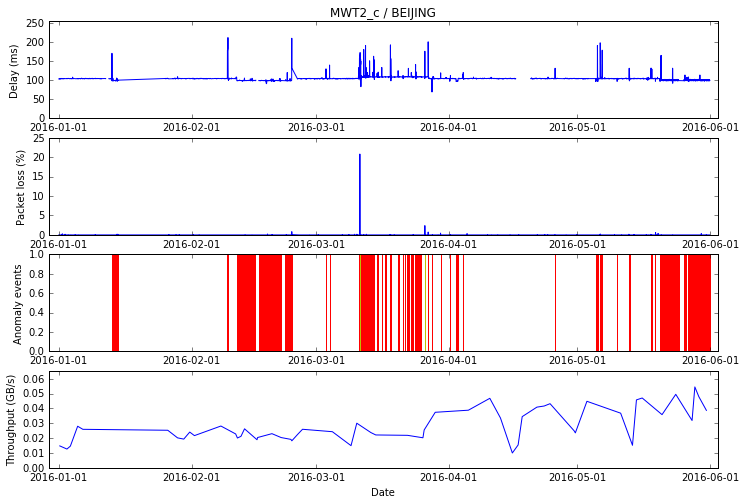

16.  SFU -> MWT2_a


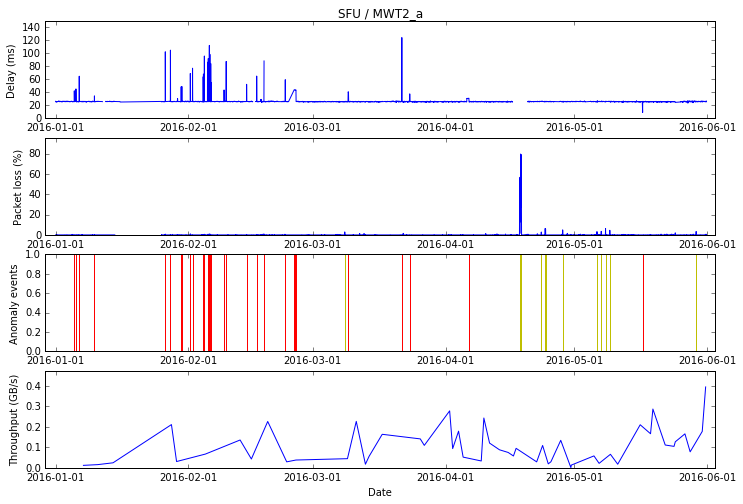

17.  SFU -> MWT2_b


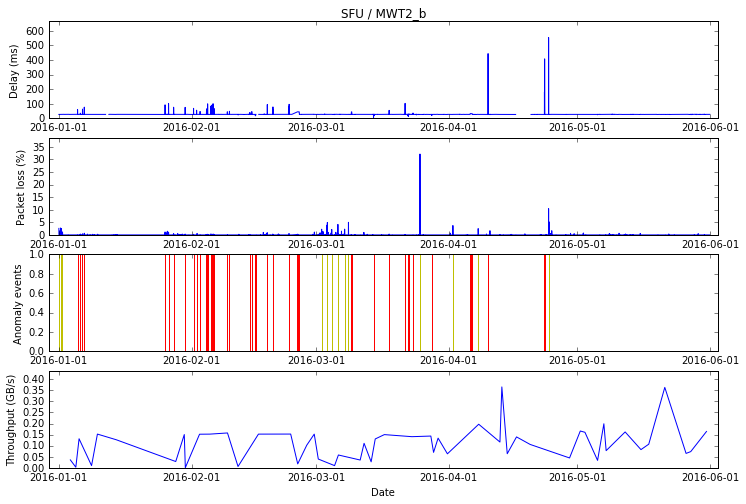

18.  SFU -> MWT2_c


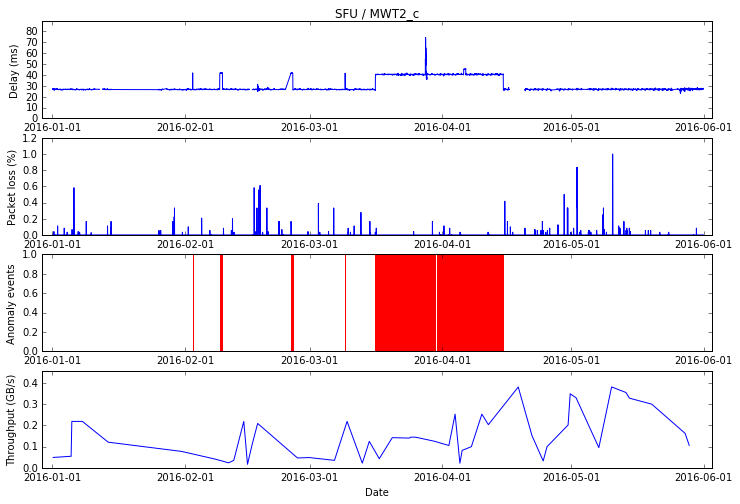

19.  SFU -> CERN


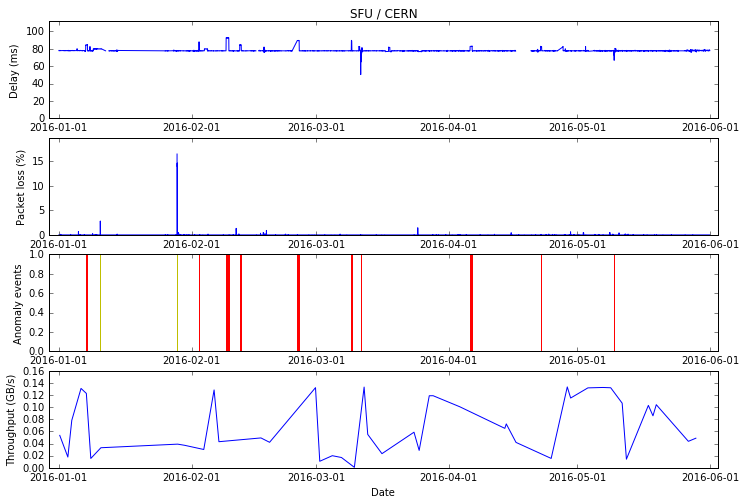

20.  SFU -> BEIJING


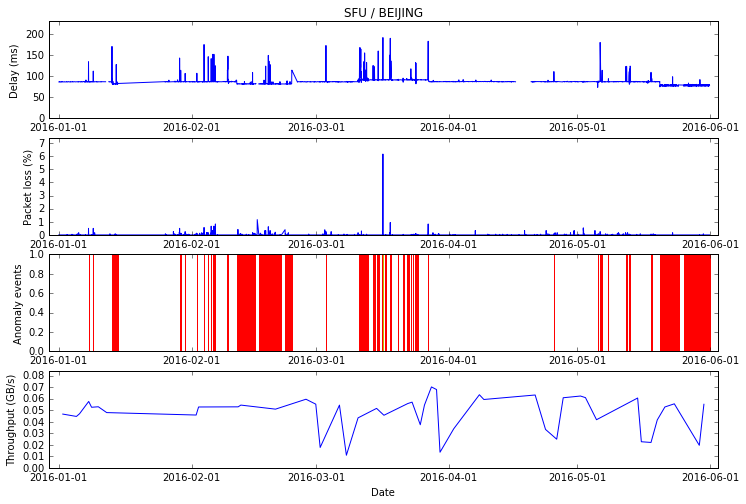

21.  CERN -> MWT2_a


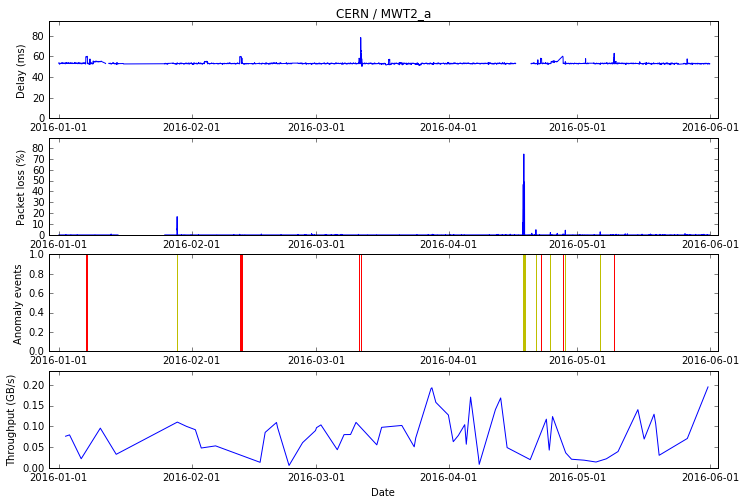

22.  CERN -> MWT2_b


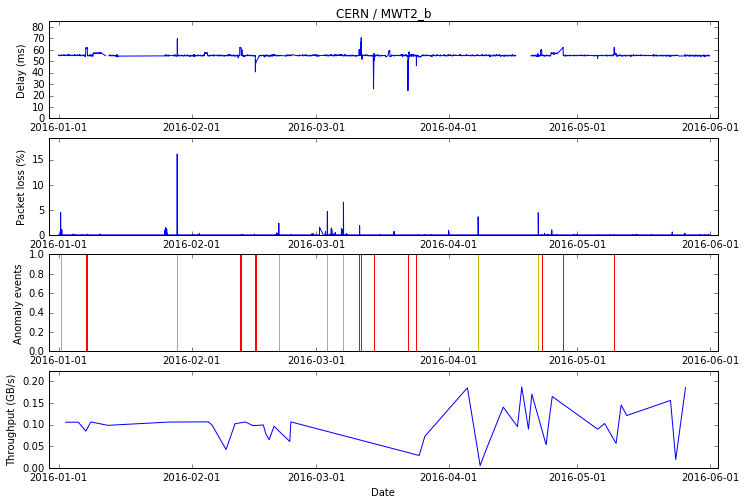

23.  CERN -> MWT2_c


24.  CERN -> SFU


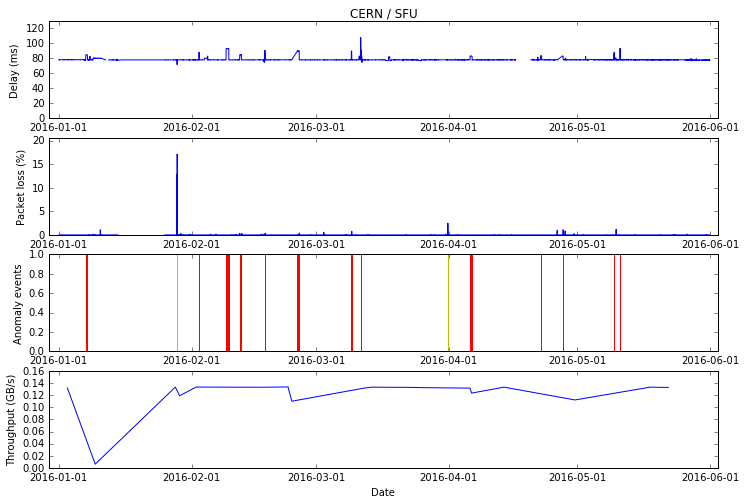

25.  CERN -> BEIJING


26.  BEIJING -> MWT2_a


27.  BEIJING -> MWT2_b


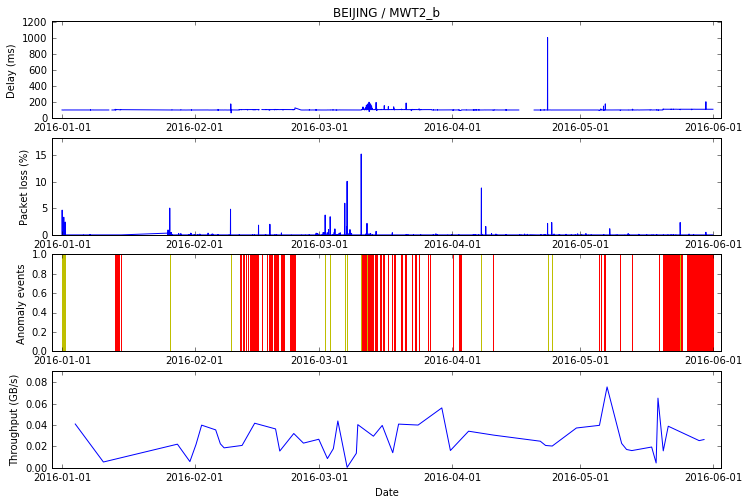

28.  BEIJING -> MWT2_c


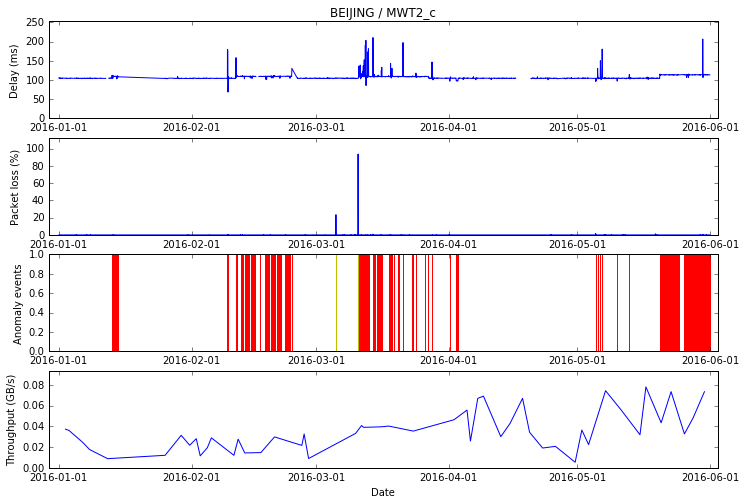

29.  BEIJING -> SFU


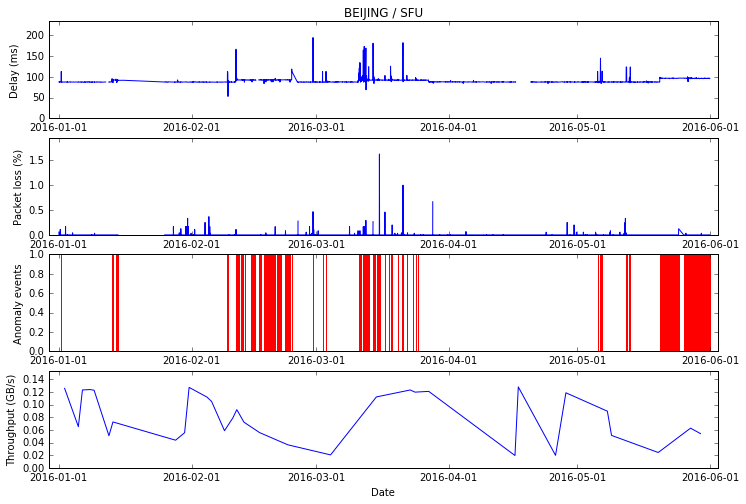

30.  BEIJING -> CERN


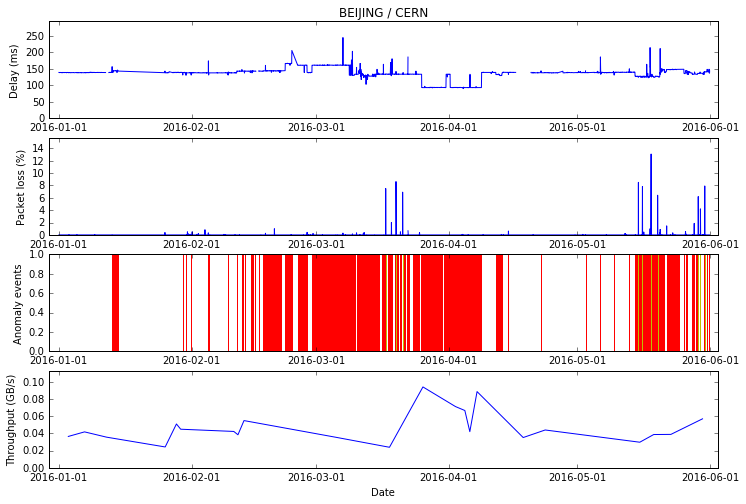

In [94]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            
            
            
#             time_window_length = 12 * 60 * 60 * 1000   # 12 hours, half a day, convert hours to ms

            dm_median = dm.median()
            pl_median = pl.median()
            
#             dm_std = dm.std()
#             pl_std = pl.std()
#             print('delay std dev = {}'.format(dm_std))
#             print('packet loss std dev = {}'.format(pl_std))


            set_dm = set()
            set_pl = set()
#             set_both = set()
            
            
            row = data_lpl.shape[0]
            for r in range(row):
                line = data_lpl.iloc[r]
                value1 = abs(line['delay_median'] - dm_median)
                value2 = abs(line['packet_loss'] * 100 - pl_median)
#                 flag1 = False
#                 flag2 = False
                if value1 > 5:
                    set_dm.add(data_lpl.index[r])
#                     flag1 = True
                if value2 > 2:
                    set_pl.add(data_lpl.index[r])
#                     flag2 = True
#                 if flag1 and flag2:
#                     set_both.add(data_lpl.index[r])
#                 data_lpl.set_value(data_lpl.index[r], 'delay_anml_abs', value1)
#                 data_lpl.set_value(data_lpl.index[r], 'packet_loss_anml_abs', value2)
#                 data_lpl.set_value(data_lpl.index[r], 'multiple_score', value1 * value2)
                
            
            plt.figure(figsize=[12, 8])
            
            plt.subplot(4, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(4, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            


#             plt.subplot(6, 1, 3)
#             plt.plot(time_lpl, data_lpl.delay_anml_abs, label='Delay anomaly abs (ms)', color='k')
#             plt.ylabel('Delay anomaly abs (ms)')
#             plt.ylim([0, data_lpl.delay_anml_abs.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            
            
#             plt.subplot(6, 1, 4)
#             plt.plot(time_lpl, data_lpl.packet_loss_anml_abs, label='Packet loss anomaly abs (%)', color='k')
#             plt.ylabel('Packet loss anomaly abs (%)')
#             plt.ylim([0, data_lpl.packet_loss_anml_abs.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)
            
            
            
#             plt.subplot(6, 1, 5)
#             plt.plot(time_lpl, data_lpl.multiple_score, label='Multiple score (ms * %)', color='k')
#             plt.ylabel('Multiple score (ms * %)')
#             plt.ylim([0, data_lpl.multiple_score.max() * 1.2])
#             plt.xlim([1451400000000, 1464900000000])
#             plt.xticks(x, lbl, rotation=0)

            
    
            plt.subplot(4, 1, 3)
            for t in set_dm:
                plt.axvline(x=t, ymin=0, ymax=1, color='r')
            for t in set_pl:
                plt.axvline(x=t, ymin=0, ymax=1, color='y')
#             for t in set_both:
#                 plt.axvline(x=t, ymin=0, ymax=1, color='r')
#             plt.ylabel('Anomaly events (black=latency, yellow=packet loss, red=both)')
            plt.ylabel('Anomaly events')
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            
            
            plt.subplot(4, 1, 4)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (GB/s)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()